<a href="https://colab.research.google.com/github/Favourj-bit/Random_projects/blob/main/poverty_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Defining Important Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [ ]:
#function to drop missing values

def drop_columns(data, threshold):
    # Calculate percentage of missing values for each column
    missing_percentage = (data.isnull().sum() / len(data)) * 100

    # Create a DataFrame to display the results
    missing_df = pd.DataFrame({'Column': data.columns, 'Missing Percentage': missing_percentage})

    # Get the columns to drop
    columns_to_drop = missing_df[missing_df['Missing Percentage'] > threshold]['Column']

    # Drop the columns from the DataFrame
    data = data.drop(columns=columns_to_drop)

    return data

In [ ]:
#function to check missing data percentage

def missing_values(data):
  missing_percentage = (data.isnull().sum() / len(data)) * 100

  # Create a DataFrame to display the results
  missing_df = pd.DataFrame({'Column': data.columns, 'Missing Percentage': missing_percentage})

  # Sort the DataFrame by missing percentage in descending order
  missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

  # Print the DataFrame
  return missing_df

# Analysis of Surveys

## Handling Roster Survey Data




In [ ]:
roster = pd.read_csv('/content/drive/MyDrive/Dataset/sect1_roster.csv')
roster.head()

,zone,state,lga,sector,ea,hhid,indiv,s01q02,s01q03,s01q03_os,s01q04a,s01q04b,s01q05,s01q05a,s01q05b,s01q06a,s01q06b,s01q07a,s01q07,s01q08,s01q09,s01q10_1,s01q10_2,s01q10_3,s01q10_4,s01q10_5,s01q10_6,s01q10a,s01q10b,s01q11,s01q12,s01q13,s01q14,s01q15,s01q17,s01q18,s01q19,s01q20,s01q21,s01q22,s01q23,s01q24,s01q25,s01q26,s01q26_os
0,4,1,101,1,186,101001,1,1,1,NaN,54,NaN,3,1,NaN,NaN,1964,1,1.0,32.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,2,NaN,NaN,16.0,2,NaN,NaN,31.0,99,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,101,1,186,101001,2,2,2,NaN,47,NaN,3,1,NaN,NaN,1971,1,1.0,23.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,2,NaN,NaN,16.0,1,2.0,NaN,0.0,99,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,101,1,186,101001,3,1,3,NaN,24,NaN,3,1,NaN,NaN,1994,1,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN,1,1.0,2.0,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,101,1,186,101001,4,2,3,NaN,22,NaN,3,2,2.0,NaN,1996,1,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN,1,1.0,2.0,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,101,1,186,101001,5,1,3,NaN,20,NaN,3,1,NaN,NaN,1998,1,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN,1,1.0,2.0,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
roster.shape

(116320, 45)

In [ ]:
roster.describe()

,zone,state,lga,sector,ea,hhid,indiv,s01q02,s01q03,s01q04a,s01q04b,s01q05,s01q05a,s01q05b,s01q06a,s01q06b,s01q07a,s01q07,s01q08,s01q09,s01q10_1,s01q10_2,s01q10_3,s01q10_4,s01q10_5,s01q10_6,s01q10a,s01q10b,s01q11,s01q12,s01q13,s01q14,s01q15,s01q17,s01q18,s01q19,s01q20,s01q21,s01q22,s01q24,s01q25,s01q26
count,116320.000000,116320.000000,116320.000000,116320.000000,116320.000000,1.163200e+05,116320.000000,116320.000000,116320.000000,116320.000000,16657.000000,116320.000000,116320.000000,90313.000000,16657.000000,116320.000000,116320.000000,74291.000000,42998.000000,37456.000000,36146.000000,2707.000000,432.000000,82.000000,5.000000,1.0,37305.000000,2238.000000,116320.000000,116320.000000,81730.000000,59510.000000,56797.000000,116320.000000,93169.000000,64528.000000,51788.000000,116320.000000,5492.000000,5423.000000,5423.000000,5492.000000
mean,3.111812,19.494825,1960.436013,1.721656,998.272954,1.960742e+06,4.180700,1.505846,2.891790,23.260763,4.474335,2.511632,1.405889,1.477993,6.387705,1995.237586,1.361322,3.997200,22.111401,1.034974,1.569109,6.310676,9.583333,13.207317,11.000000,22.0,1.939070,1.156836,1.536984,1.297369,1.271871,1.065938,26.316108,1.199029,1.307409,2.737044,17.465243,77.860574,1.012564,19.546192,1965.863175,4.627458
std,1.633008,10.658734,1065.305569,0.448186,830.003161,1.065308e+06,3.163423,0.499968,1.853545,19.640269,3.148762,0.642213,6.076503,6.947163,3.349608,19.650166,0.480386,2.814643,5.801971,0.183717,1.104899,2.541141,4.135467,5.853643,6.855655,NaN,0.239205,0.490386,0.514734,0.457102,0.444926,0.760231,58.337207,0.399271,0.461423,2.366324,35.593951,37.469654,0.111392,10.196250,1019.275277,3.931062
min,1.000000,1.000000,101.000000,1.000000,2.000000,1.010010e+05,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-98.000000,-98.000000,1.000000,1898.000000,1.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,3.000000,6.000000,22.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,-9.000000,0.000000,1.000000,1.000000,101.000000,1.000000
25%,2.000000,10.000000,1024.750000,1.000000,386.000000,1.024931e+06,2.000000,1.000000,2.000000,8.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1983.000000,1.000000,1.000000,18.000000,1.000000,1.000000,4.000000,6.000000,8.000000,6.000000,22.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,99.000000,1.000000,10.000000,1024.000000,1.000000
50%,3.000000,19.000000,1941.000000,2.000000,808.000000,1.941294e+06,3.000000,2.000000,3.000000,17.000000,4.000000,3.000000,2.000000,2.000000,6.000000,2001.000000,1.000000,3.000000,21.000000,1.000000,1.000000,6.000000,10.000000,13.000000,6.000000,22.0,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,2.000000,0.000000,99.000000,1.000000,22.000000,2209.000000,4.000000
75%,4.000000,29.000000,2904.000000,2.000000,1374.000000,2.904173e+06,6.000000,2.000000,3.000000,35.000000,7.000000,3.000000,2.000000,2.000000,9.000000,2011.000000,2.000000,7.000000,25.000000,1.000000,2.000000,8.000000,12.000000,18.000000,18.000000,22.0,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,34.000000,1.000000,2.000000,2.000000,26.000000,99.000000,1.000000,28.000000,2816.000000,8.000000
max,6.000000,37.000000,3706.000000,2.000000,7430.000000,3.706660e+06,42.000000,2.000000,15.000000,120.000000,11.000000,3.000000,2.000000,2.000000,12.000000,2019.000000,2.000000,7.000000,60.000000,2.000000,38.000000,31.000000,23.000000,28.000000,19.000000,22.0,2.000000,10.000000,4.000000,2.000000,2.000000,37.000000,424.000000,2.000000,2.000000,38.000000,424.000000,99.000000,2.000000,37.000000,3706.000000,13.000000


In [ ]:
roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116320 entries, 0 to 116319
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   zone       116320 non-null  int64  
 1   state      116320 non-null  int64  
 2   lga        116320 non-null  int64  
 3   sector     116320 non-null  int64  
 4   ea         116320 non-null  int64  
 5   hhid       116320 non-null  int64  
 6   indiv      116320 non-null  int64  
 7   s01q02     116320 non-null  int64  
 8   s01q03     116320 non-null  int64  
 9   s01q03_os  246 non-null     object 
 10  s01q04a    116320 non-null  int64  
 11  s01q04b    16657 non-null   float64
 12  s01q05     116320 non-null  int64  
 13  s01q05a    116320 non-null  int64  
 14  s01q05b    90313 non-null   float64
 15  s01q06a    16657 non-null   float64
 16  s01q06b    116320 non-null  int64  
 17  s01q07a    116320 non-null  int64  
 18  s01q07     74291 non-null   float64
 19  s01q08     42998 non-nu

In [ ]:
roster_missing = missing_values(roster)
roster_missing.head(10)

,Column,Missing Percentage
s01q10_6,s01q10_6,99.999140
s01q10_5,s01q10_5,99.995702
s01q10_4,s01q10_4,99.929505
s01q03_os,s01q03_os,99.788514
s01q26_os,s01q26_os,99.736933
s01q10_3,s01q10_3,99.628611
s01q10b,s01q10b,98.075997
s01q10_2,s01q10_2,97.672799
s01q25,s01q25,95.337861
s01q24,s01q24,95.337861


In [ ]:
_columns = [
    's01q05', 's01q05a', 's01q05b', 's01q06a', 's01q06b', 's01q10a', 's01q10b',
    's01q14', 's01q04b', 's01q09', 's01q08', 's01q19', 's01q14',
    's01q10_1', 's01q10_2', 's01q10_3', 's01q10_4', 's01q10_5', 's01q10_6', 's01q03_os',
    's01q22', 's01q23', 's01q24', 's01q25', 's01q26', 's01q26_os'
]

In [ ]:
#Dropping columns with large amount of missing values and columns which
#may not be useful for the poverty prediction model

roster = roster.drop(columns=_columns)

In [ ]:
roster.shape

(116320, 20)

In [ ]:
# Calculate percentage of missing values for each column

(roster.isnull().sum()/len(roster)) * 100

zone        0.000000
state       0.000000
lga         0.000000
sector      0.000000
ea          0.000000
hhid        0.000000
indiv       0.000000
s01q02      0.000000
s01q03      0.000000
s01q04a     0.000000
s01q07a     0.000000
s01q07     36.132221
s01q11      0.000000
s01q12      0.000000
s01q13     29.736933
s01q15     51.171768
s01q17      0.000000
s01q18     19.902854
s01q20     55.477992
s01q21      0.000000
dtype: float64

In [ ]:
roster_columns = roster.columns

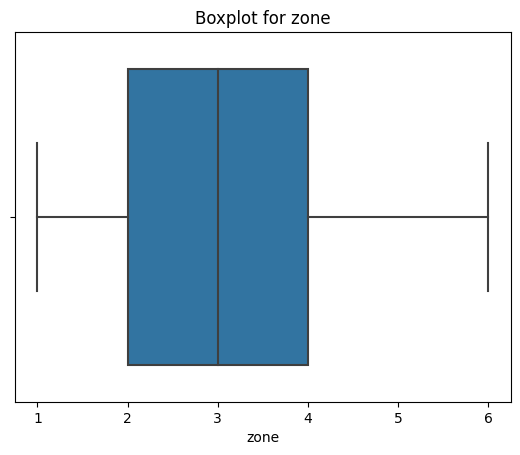

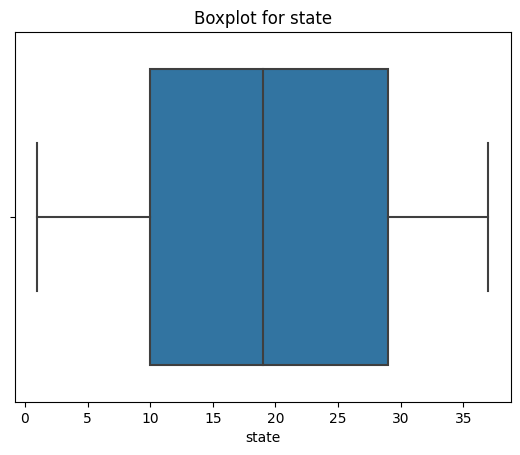

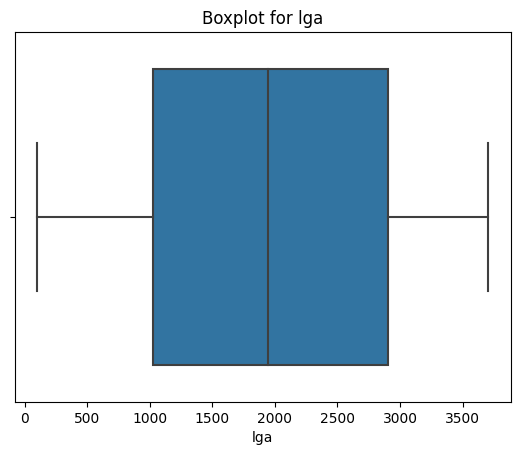

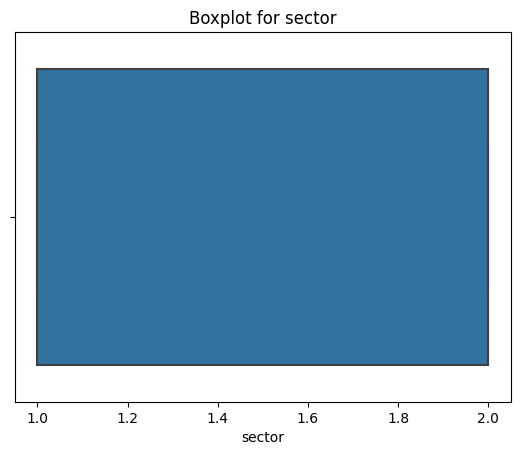

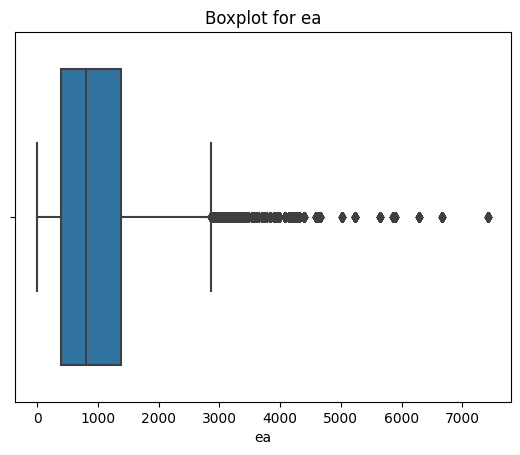

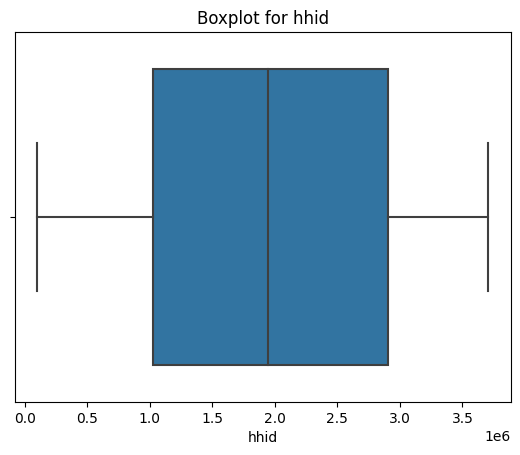

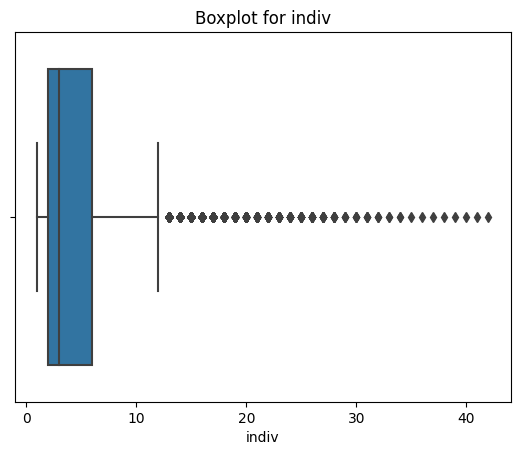

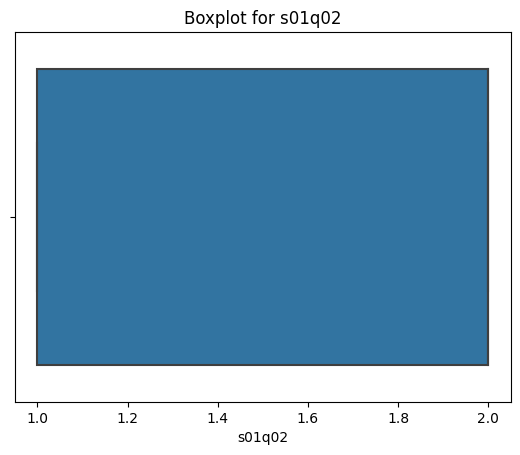

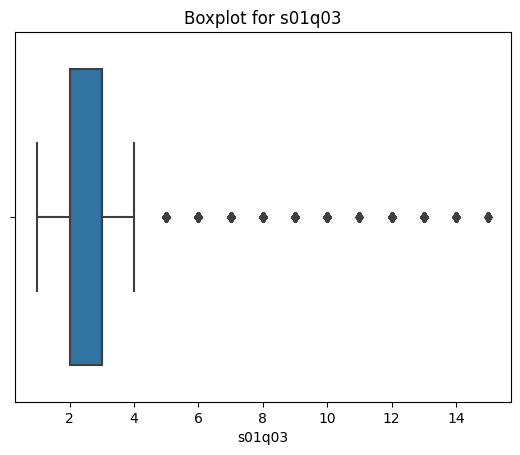

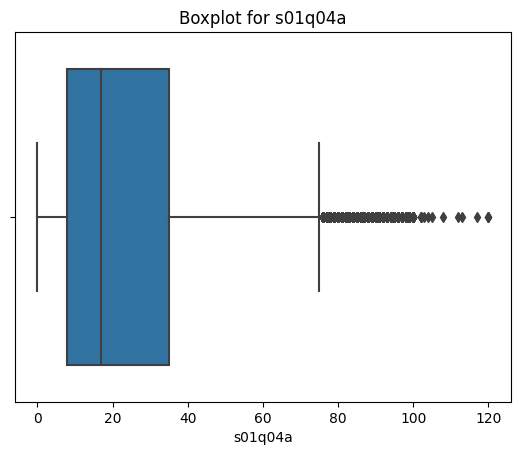

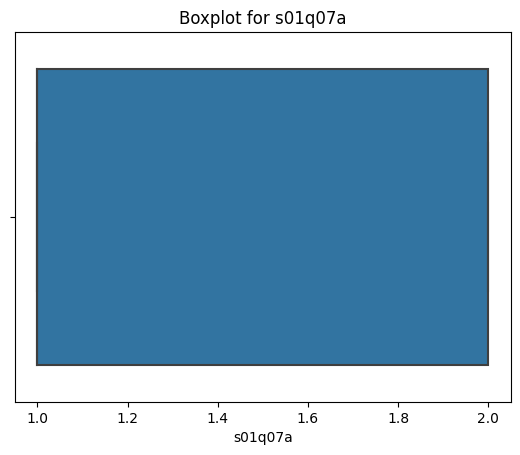

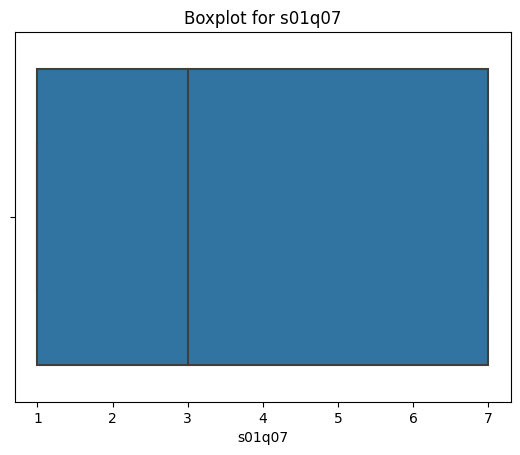

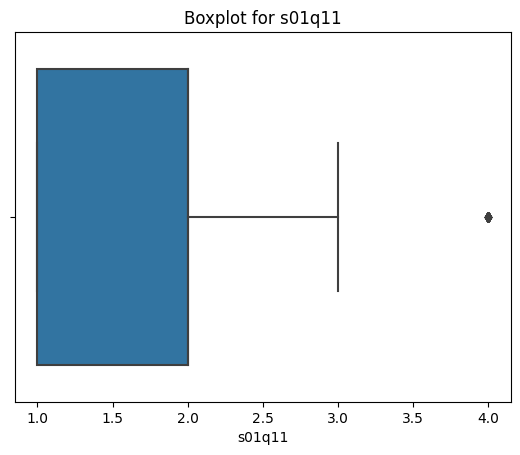

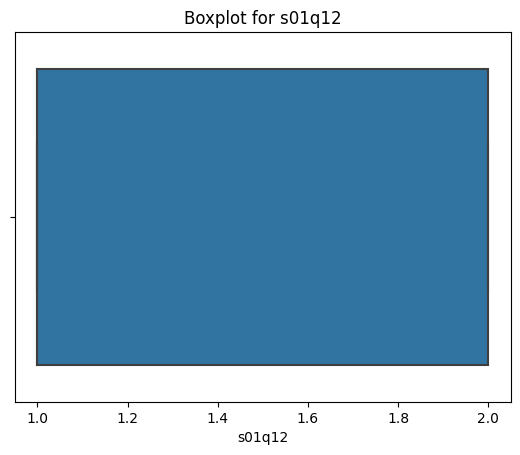

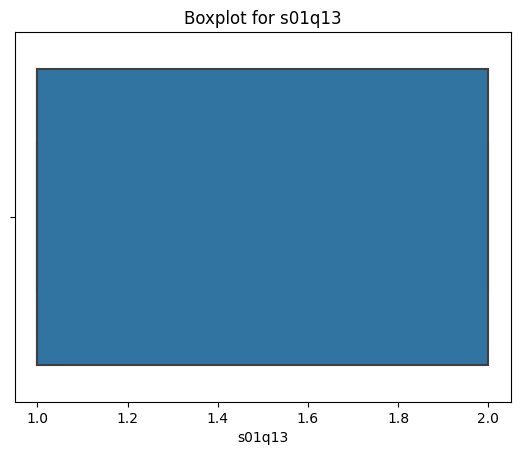

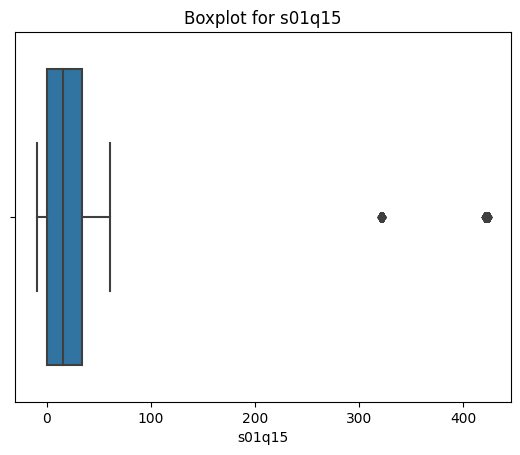

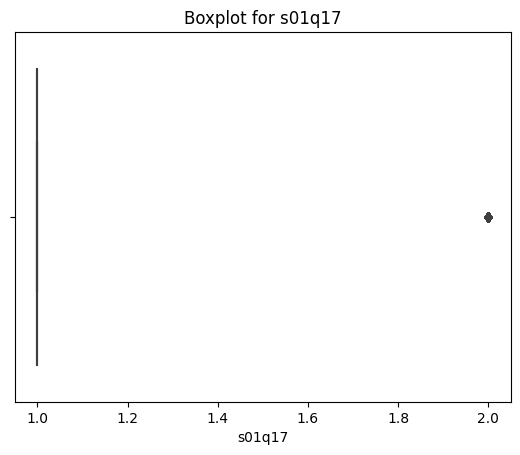

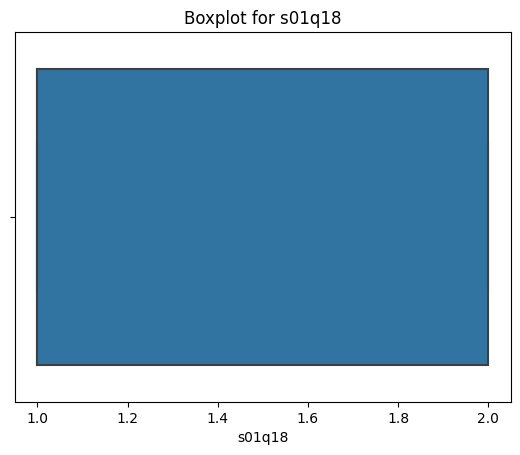

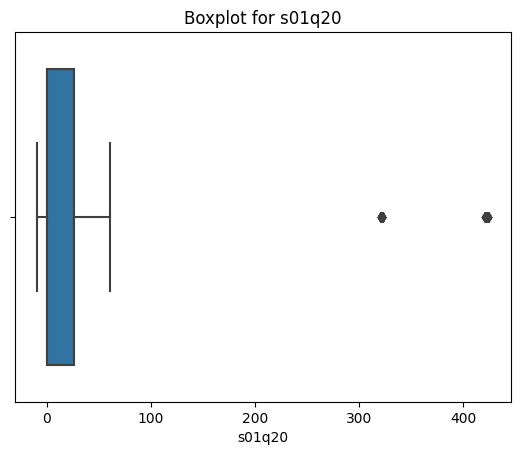

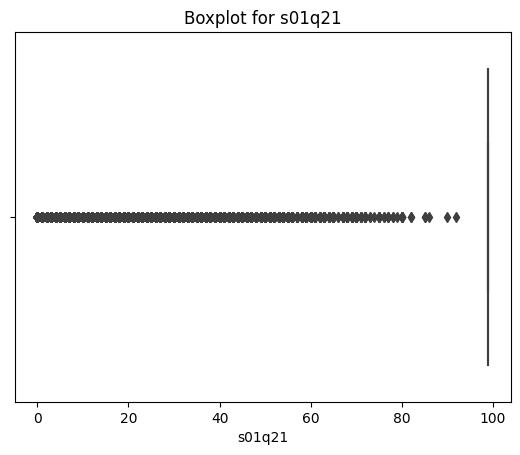

In [ ]:
for column in roster_columns:
  sns.boxplot(x=roster[column])
  plt.title(f'Boxplot for {column}')
  plt.show()

## Handling Education Survey data

In [ ]:
edu = pd.read_csv('/content/drive/MyDrive/Dataset/sect2_education.csv', low_memory=False)
edu.head()

,zone,state,lga,sector,ea,hhid,indiv,s02q01,s02q02,s02q03,school_yr,s02q04,s02q04b,s02q04c__1,s02q04c__2,s02q04c__3,s02q04c__10,s02q04c__11,s02q04c__12,s02q04c__13,s02q04c__14,s02q04c__15,s02q04c__16,s02q04c__17,s02q04c__18,s02q04c__19,s02q04c__20,s02q04c__21,s02q04c__22,s02q04c__4,s02q04c_os,s02q05,s02q06,s02q06_os,s02q07,s02q08,s02q08_os,s02q09,s02q10,s02q11,s02q11_os,s02q12,s02q13,s02q13_os,s02q14a,s02q14a_os,s02q14b,s02q15,s02q15_os,s02q16,s02q17,s02q17a,s02q17b,s02q18,s02q18a,s02q18b,s02q18c,s02q18d,s02q18e,s02q18f,s02q18g,s02q18h,s02q18i,s02q18j,s02q18k,s02q18l,s02q18m,s02q18n,s02q18o,s02q18p,s02q18q,s02q18r,s02q18t,s02q19,s02q19a,s02q19b,s02q19c,s02q19d,s02q19e,s02q19f,s02q19g,s02q19h,s02q19i,s02q19j,s02q19k,s02q19l,s02q19m,s02q19n,s02q19o,s02q19p,s02q19q,s02q19r,s02q19t,s02q20,s02q21,s02q21a,s02q21b,s02q21c,s02q21d,s02q21e,s02q21f,s02q21g,s02q21h,s02q21i,s02q21j,s02q21k,s02q21l,s02q21m,s02q21n,s02q21o,s02q21p,s02q21q,s02q21r,s02q21t
0,4,1,101,1,186,101001,1,1,1.0,NaN,2017/2018,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,26.0,6.0,NaN,2.0,NaN,NaN,NaN,2.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,101,1,186,101001,2,1,1.0,NaN,2017/2018,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35.0,8.0,NaN,2.0,NaN,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,101,1,186,101001,3,1,1.0,NaN,2017/2018,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,422.0,9.0,NaN,1.0,422.0,1.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0,NaN,2.0,2.0,1.0,72000.0,0.0,0.0,5000.0,0.0,0.0,65000.0,0.0,0.0,0.0,21000.0,6000.0,0.0,5000.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,101,1,186,101001,4,1,1.0,NaN,2017/2018,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,421.0,6.0,NaN,1.0,421.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,2.0,NaN,2.0,2.0,1.0,42000.0,0.0,5000.0,0.0,0.0,0.0,75000.0,0.0,0.0,0.0,20000.0,0.0,0.0,21000.0,32000.0,2500.0,0.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,101,1,186,101001,5,1,1.0,NaN,2017/2018,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,421.0,6.0,NaN,1.0,421.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,2.0,NaN,2.0,2.0,1.0,42000.0,0.0,0.0,10000.0,0.0,0.0,65000.0,0.0,0.0,0.0,18000.0,0.0,0.0,24000.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
edu.shape

(116320, 114)

In [ ]:
edu_missing = missing_values(edu)
edu_missing.head(20)

,Column,Missing Percentage
s02q14a_os,s02q14a_os,99.981946
s02q11_os,s02q11_os,99.977648
s02q08_os,s02q08_os,99.882221
s02q17,s02q17,99.829780
s02q15_os,s02q15_os,99.769601
s02q06_os,s02q06_os,99.743810
s02q13_os,s02q13_os,99.549519
s02q21t,s02q21t,99.324278
s02q19t,s02q19t,99.289890
s02q04c_os,s02q04c_os,98.613308


In [ ]:
edu = drop_columns(edu, 70)

In [ ]:
edu.shape

(116320, 44)

In [ ]:
#checking the columns in order to compare with the description of the survey data
#This is done in order to know columns which may not be necessary in poverty prediction and drop them

edu.columns

Index(['zone', 'state', 'lga', 'sector', 'ea', 'hhid', 'indiv', 's02q01',
       's02q02', 's02q03', 'school_yr', 's02q04', 's02q04b', 's02q04c__1',
       's02q04c__2', 's02q04c__3', 's02q04c__10', 's02q04c__11', 's02q04c__12',
       's02q04c__13', 's02q04c__14', 's02q04c__15', 's02q04c__16',
       's02q04c__17', 's02q04c__18', 's02q04c__19', 's02q04c__20',
       's02q04c__21', 's02q04c__22', 's02q04c__4', 's02q05', 's02q07',
       's02q08', 's02q09', 's02q10', 's02q11', 's02q12', 's02q13', 's02q14a',
       's02q14b', 's02q15', 's02q16', 's02q17a', 's02q17b'],
      dtype='object')

In [ ]:
other_drop_columns = [
    's02q04c__1', 's02q04c__2', 's02q04c__3', 's02q04c__10', 's02q04c__11',
    's02q04c__12', 's02q04c__13', 's02q04c__14', 's02q04c__15', 's02q04c__16',
    's02q04c__17', 's02q04c__18', 's02q04c__19', 's02q04c__20', 's02q04c__21',
    's02q04c__22', 's02q04c__4', 's02q17a', 's02q17b'
]

In [ ]:
edu = edu.drop(columns=other_drop_columns)

In [ ]:
edu.head()

,zone,state,lga,sector,ea,hhid,indiv,s02q01,s02q02,s02q03,school_yr,s02q04,s02q04b,s02q05,s02q07,s02q08,s02q09,s02q10,s02q11,s02q12,s02q13,s02q14a,s02q14b,s02q15,s02q16
0,4,1,101,1,186,101001,1,1,1.0,NaN,2017/2018,1.0,2.0,1.0,26.0,6.0,2.0,NaN,NaN,2.0,15.0,NaN,NaN,NaN,NaN
1,4,1,101,1,186,101001,2,1,1.0,NaN,2017/2018,1.0,2.0,1.0,35.0,8.0,2.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN
2,4,1,101,1,186,101001,3,1,1.0,NaN,2017/2018,1.0,1.0,1.0,422.0,9.0,1.0,422.0,1.0,2.0,1.0,1.0,NaN,3.0,2.0
3,4,1,101,1,186,101001,4,1,1.0,NaN,2017/2018,1.0,2.0,1.0,421.0,6.0,1.0,421.0,1.0,1.0,NaN,1.0,NaN,3.0,2.0
4,4,1,101,1,186,101001,5,1,1.0,NaN,2017/2018,1.0,2.0,1.0,421.0,6.0,1.0,421.0,1.0,1.0,NaN,1.0,NaN,3.0,2.0


In [ ]:
edu.isnull().sum()/len(edu) * 100

zone          0.000000
state         0.000000
lga           0.000000
sector        0.000000
ea            0.000000
hhid          0.000000
indiv         0.000000
s02q01        0.000000
s02q02        7.946183
s02q03       37.717503
school_yr     7.946183
s02q04        7.946183
s02q04b       7.946183
s02q05        7.946183
s02q07       27.464752
s02q08       27.464752
s02q09       27.464752
s02q10       65.328404
s02q11       65.319807
s02q12       27.464752
s02q13       60.752235
s02q14a      65.319807
s02q14b      66.998796
s02q15       65.319807
s02q16       65.319807
dtype: float64

## Handling Health Survey Data

In [ ]:
health = pd.read_csv('/content/drive/MyDrive/Dataset/sect3_health.csv', low_memory=False)
health.head()

,zone,state,lga,sector,ea,hhid,indiv,s03q01,s03q02,s03q03,s03q04_1,s03q04_2,s03q05,s03q06_1,s03q06_2,s03q06_os,s03q07a,s03q08,s03q09,s03q10_1,s03q10_2,s03q10_os,s03q11__1,s03q11__2,s03q11__3,s03q11__4,s03q11__5,s03q12,s03q12_os,s03q13,s03q13_os,s03q14,s03q15,s03q16a,s03q16b,s03q17,s03q18,s03q18b,s03q18b_os,s03q19,s03q20,s03q21,s03q22,s03q23,s03q24,s03q25,s03q26,s03q27,s03q28,s03q29,s03q30,s03q31,s03q32,s03q32_os,s03q33
0,4,1,101,1,186,101001,1,1,NaN,2,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1,1,1,1,1,1,2,NaN,NaN,2,NaN,NaN,NaN
1,4,1,101,1,186,101001,2,1,NaN,2,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1,1,1,1,1,1,2,NaN,NaN,2,NaN,NaN,NaN
2,4,1,101,1,186,101001,3,1,NaN,1,1.0,NaN,NaN,2.0,NaN,NaN,5.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,9.0,NaN,300.0,500.0,40.0,2.0,1.0,5400.0,3.0,NaN,2,NaN,NaN,1,1,1,1,1,1,2,NaN,NaN,2,NaN,NaN,NaN
3,4,1,101,1,186,101001,4,1,NaN,2,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1,1,1,1,1,1,2,NaN,NaN,2,NaN,NaN,NaN
4,4,1,101,1,186,101001,5,1,NaN,1,1.0,NaN,NaN,2.0,NaN,NaN,3.0,2.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,0.0,300.0,2.0,1.0,1.0,2000.0,3.0,NaN,2,NaN,NaN,1,1,1,1,1,1,2,NaN,NaN,2,NaN,NaN,NaN


In [ ]:
health.shape

(116320, 55)

In [ ]:
hea_mis = missing_values(health)
hea_mis.head(20)

,Column,Missing Percentage
s03q13_os,s03q13_os,100.000000
s03q18b_os,s03q18b_os,99.987964
s03q32_os,s03q32_os,99.986245
s03q10_os,s03q10_os,99.940681
s03q12_os,s03q12_os,99.908012
s03q04_2,s03q04_2,99.424003
s03q06_os,s03q06_os,98.844567
s03q30,s03q30,98.475757
s03q10_2,s03q10_2,97.844739
s03q11__2,s03q11__2,97.246389


In [ ]:
health = drop_columns(health, 70)

In [ ]:
#Dropping columns which are unnecessary for the poverty prediction model

columns_drop = [
    's03q16a', 's03q16b', 's03q18', 's03q18b', 's03q04_1', 's03q07a',
    's03q08', 's03q10_1', 's03q12', 's03q14', 's03q15', 's03q17'
]

In [ ]:
health = health.drop(columns=columns_drop)

In [ ]:
(health.isnull().sum()/len(health))*100

zone         0.000000
state        0.000000
lga          0.000000
sector       0.000000
ea           0.000000
hhid         0.000000
indiv        0.000000
s03q01       0.000000
s03q02      29.703404
s03q03       0.000000
s03q05      31.758941
s03q06_1    62.994326
s03q19       0.000000
s03q22       0.000000
s03q23       0.000000
s03q24       0.000000
s03q25       0.000000
s03q26       0.000000
s03q27       0.000000
s03q28       0.000000
s03q31       0.000000
s03q32      46.391850
s03q33      46.391850
dtype: float64

In [ ]:
health.shape

(116320, 23)

## Handling Labour Survey Data

In [ ]:
labour = pd.read_csv('/content/drive/MyDrive/Dataset/sect4a1_labour.csv', low_memory=False)
labour.head()

,zone,state,lga,sector,ea,hhid,indiv,s04aq01,s04aq02,s04aq03,s04aq04,s04aq05,s04aq06,s04aq07,s04aq08,s04aq09,s04aq10,s04aq11,s04aq12,s04aq13__0,s04aq13__1,s04aq13__2,s04aq13__3,s04aq13__4,s04aq13__8,s04aq13__9,s04aq13__10,s04aq13__11,s04aq13__12,s04aq13__13,s04aq13_os,s04aq16,s04aq17,s04aq18,s04aq18_os,s04aq19,s04aq20,s04aq21,s04aq22,s04aq22_os,s04aq22a_1,s04aq22a_2,s4aq22a_os,s04aq23,s04aq24,s04aq24_os,s04aq25,s04aq26,s04aq27,s04aq28a,s04aq28b,s04aq29,s04aq29_os,s04aq30,s04aq30_os,s04aq31,s04aq32,s04aq32a,s04aq33,s04aq34,s04aq35,s04aq36,s04aq37,s04aq38,s04aq39__1,s04aq39__2,s04aq39__3,s04aq39__4,s04aq39__5,s04aq39_os,s04aq40__0,s04aq40__1,s04aq40__2,s04aq40__3,s04aq40__4,s04aq40__5,s04aq40__6,s04aq40__7,s04aq40__8,s04aq40__9,s04aq40__10,s04aq40__11,s04aq40__12,s04aq40__13,s04aq40__14,s04aq40__15,s04aq40__16,s04aq40__17,s04aq40__18,s04aq40__19,s04aq40__20,s04aq40__21,s04aq40__22,s04aq40__23,s04aq40__24,s04aq40__25,s04aq41,s04aq42,s04aq43,s04aq43b,s04aq44_1,s04aq44_2,s04aq44_3,s04aq44_4,s04aq44_5,s04aq45,s04aq46a,s04aq46b,s04aq47,s04aq48,s04aq49a,s04aq49b,s04aq50,s04aq50_os,s04aq51,s04aq51_os,s04aq52__0,s04aq52__1,s04aq52__2,s04aq52__3,s04aq52__4,s04aq52__5,s04aq52__6,s04aq52__7,s04aq52__8,s04aq52__9,s04aq52__10,s04aq52__11,s04aq52__12,s04aq52__13,s04aq52__14,s04aq52__15,s04aq52__16,s04aq52__17,s04aq52__18,s04aq52__19,s04aq52__20,s04aq52__21,s04aq52__22,s04aq52__23,s04aq52__24,s04aq52__25,s04aq53,s04aq54,s04aq55a,s04aq55b,s04aq55c_1,s04aq55c_2,s04aq55c_3,s04aq55c_4,s04aq55c_5,s04aq55d,s04aq55e,s04aq55f,s04aq56,s04aq57,s04aq58,s04aq59
0,4,1,101,1,186,101001,1,1,1.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,45.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN
1,4,1,101,1,186,101001,2,1,1.0,NaN,1.0,40.0,2.0,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,She is a nursing sister,2230.0,12.0,NaN,2.0,NaN,2.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,40.0,120000.0,5.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN
2,4,1,101,1,186,101001,3,1,1.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN
3,4,1,101,1,186,101001,4,1,1.0,NaN,2.0,NaN,1.0,12.0,4.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
labour.shape

(116320, 158)

In [ ]:
mis_lab = missing_values(labour)
mis_lab.head(10)

,Column,Missing Percentage
s04aq44_5,s04aq44_5,99.999140
s04aq55c_5,s04aq55c_5,99.999140
s04aq55c_4,s04aq55c_4,99.998281
s4aq22a_os,s4aq22a_os,99.996561
s04aq13_os,s04aq13_os,99.994842
s04aq44_4,s04aq44_4,99.993982
s04aq24_os,s04aq24_os,99.990543
s04aq30_os,s04aq30_os,99.990543
s04aq52__1,s04aq52__1,99.986245
s04aq40__1,s04aq40__1,99.984525


In [ ]:
labour = drop_columns(labour, 70)

In [ ]:
labour.columns

Index(['zone', 'state', 'lga', 'sector', 'ea', 'hhid', 'indiv', 's04aq01',
       's04aq02', 's04aq03', 's04aq04', 's04aq06', 's04aq09', 's04aq11',
       's04aq16', 's04aq17', 's04aq21', 's04aq22', 's04aq25', 's04aq26',
       's04aq27', 's04aq47', 's04aq48', 's04aq56', 's04aq58', 's04aq59'],
      dtype='object')

In [ ]:
labour.shape

(116320, 26)

In [ ]:
drop_ = ['s04aq03', 's04aq16', 's04aq17', 's04aq22','s04aq25', 's04aq26',
         's04aq27', 's04aq47',  's04aq56', 's04aq58', 's04aq59']

In [ ]:
labour = labour.drop(columns=drop_)

In [ ]:
labour.shape

(116320, 15)

## Handling Remittances Survey Data

In [ ]:
rem = pd.read_csv('/content/drive/MyDrive/Dataset/sect5_remittances.csv', low_memory=False)
rem.head()

,zone,state,lga,sector,ea,hhid,indiv,s05q0,s05q0a,s05q0b,s05q01a,s05q01b,s05q01c,s05q01d,s05q01e,s05q02a,s05q02b,s05q02b_os,s05q03,s05q03_os,s05q04,s05q04_os,s05q05,s05q06__1,s05q06__2,s05q06__3,s05q06__4,s05q06__5,s05q06_os,s05q07,s05q07b,s05q07b_os,s05q08__1,s05q08__2,s05q08__3,s05q08__4,s05q08__5,s05q08__6,s05q08__10,s05q08_os,s05q09,s05q09_os,s05q10,s05q11,s05q12,s05q12_os,s05q13,s05q13_os,s05q14,s05q15__1,s05q15__2,s05q15__3,s05q15__4,s05q15__6,s05q15__5,s05q15_os,s05q16
0,4,1,101,1,186,101001,1,1,1.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,101,1,186,101001,2,1,1.0,NaN,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50000.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,101,1,186,101001,3,1,1.0,NaN,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20000.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,101,1,186,101001,4,1,1.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,101,1,186,101001,5,1,1.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rem.shape

(116320, 57)

In [ ]:
mis_rem = missing_values(rem)
mis_rem.head(20)

,Column,Missing Percentage
s05q03_os,s05q03_os,100.000000
s05q09_os,s05q09_os,99.999140
s05q07b_os,s05q07b_os,99.999140
s05q08_os,s05q08_os,99.999140
s05q02b_os,s05q02b_os,99.993122
s05q06_os,s05q06_os,99.991403
s05q04_os,s05q04_os,99.985385
s05q12_os,s05q12_os,99.943260
s05q13_os,s05q13_os,99.889959
s05q15_os,s05q15_os,99.830640


In [ ]:
rem = drop_columns(rem, 70)

In [ ]:
rem.shape

(116320, 18)

In [ ]:
rem.columns

Index(['zone', 'state', 'lga', 'sector', 'ea', 'hhid', 'indiv', 's05q0',
       's05q0a', 's05q0b', 's05q01a', 's05q01b', 's05q01c', 's05q01d',
       's05q01e', 's05q05', 's05q10', 's05q14'],
      dtype='object')

In [ ]:
drop_col = ['s05q0b','s05q01e', 's05q05','s05q10','s05q14']

In [ ]:
rem = rem.drop(columns=drop_col)

In [ ]:
rem.shape

(116320, 13)

# Merging All The Surveys

In [ ]:
roster.to_csv("roster_cleaned.csv", index=False)
edu.to_csv("edu_cleaned.csv", index=False)
health.to_csv("health_cleaned.csv", index=False)
rem.to_csv("rem_cleaned.csv", index=False)
labour.to_csv("labour_cleaned.csv", index=False)

In [ ]:
# List of dataset filenames
dataset_files = ['roster_cleaned.csv', 'edu_cleaned.csv', 'health_cleaned.csv',
                 'labour_cleaned.csv', 'rem_cleaned.csv']

# Iterate through each dataset
for filename in dataset_files:
    # Load the dataset
    df = pd.read_csv(filename)

    # Display unique values of "hhid" and "individual id"
    unique_hhid = df['hhid'].unique()
    unique_individual_id = df['indiv'].unique()

    print(f"Dataset: {filename}")
    print("Unique hhid values:", unique_hhid)
    print("Unique individual id values:", unique_individual_id)
    print("\n")

Dataset: roster_cleaned.csv
Unique hhid values: [ 101001  101002  101003 ... 3706655 3706656 3706660]
Unique individual id values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


Dataset: edu_cleaned.csv
Unique hhid values: [ 101001  101002  101003 ... 3706655 3706656 3706660]
Unique individual id values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


Dataset: health_cleaned.csv
Unique hhid values: [ 101001  101002  101003 ... 3706655 3706656 3706660]
Unique individual id values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


Dataset: labour_cleaned.csv
Unique hhid values: [ 101001  101002  101003 ... 3706655 3706656 3706660]
Unique individual id values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 

In [ ]:
# List of dataset filenames
dataset_files = ['roster_cleaned.csv', 'edu_cleaned.csv', 'health_cleaned.csv',
                 'labour_cleaned.csv', 'rem_cleaned.csv']

# Iterate through each dataset
for filename in dataset_files:
    # Load the dataset
    df = pd.read_csv(filename, low_memory=False)

    df_shape = df.shape
    print(f"Dataset: {filename}")
    print("data shape", df_shape)
    print("\n")

Dataset: roster_cleaned.csv
data shape (116320, 20)


Dataset: edu_cleaned.csv
data shape (116320, 25)


Dataset: health_cleaned.csv
data shape (116320, 23)


Dataset: labour_cleaned.csv
data shape (116320, 15)


Dataset: rem_cleaned.csv
data shape (116320, 13)




In [ ]:
# List of dataset names and DataFrames
datasets = [('roster', roster), ('education', edu), ('health', health), ('labour', labour), ('remittances', rem)]

# Compare columns for each dataset with the roster and labour datasets
for dataset_name, dataset in datasets:
    columns_to_compare = ["zone", "state", "lga", "sector", "ea", "hhid", "indiv"]
    comparison_result = dataset[columns_to_compare].equals(roster[columns_to_compare]) and dataset[columns_to_compare].equals(labour[columns_to_compare])

    print(f"{dataset_name} columns comparison result: {comparison_result}")

roster columns comparison result: True
education columns comparison result: True
health columns comparison result: True
labour columns comparison result: True
remittances columns comparison result: True


Merging Datasets

In [ ]:
dataset_files = ['roster_cleaned.csv', 'edu_cleaned.csv', 'health_cleaned.csv',
                 'labour_cleaned.csv', 'rem_cleaned.csv']

# Load all datasets into a list of DataFrames
datasets = [pd.read_csv(filename, low_memory=False) for filename in dataset_files]

# Merge datasets based on index
merged_data = datasets[0]
for df in datasets[1:]:
    merged_data = merged_data.merge(df, left_index=True, right_index=True, suffixes=('_drop', ''))

# Drop the duplicate columns
columns_to_drop = [col for col in merged_data.columns if col.endswith('_drop')]
merged_data = merged_data.drop(columns=columns_to_drop)

# Print the shape of the merged dataset
print("Merged dataset shape:", merged_data.shape)

Merged dataset shape: (116320, 68)


In [ ]:
merged_data.head()

,s01q02,s01q03,s01q04a,s01q07a,s01q07,s01q11,s01q12,s01q13,s01q15,s01q17,s01q18,s01q20,s01q21,s02q01,s02q02,s02q03,school_yr,s02q04,s02q04b,s02q05,s02q07,s02q08,s02q09,s02q10,s02q11,s02q12,s02q13,s02q14a,s02q14b,s02q15,s02q16,s03q01,s03q02,s03q03,s03q05,s03q06_1,s03q19,s03q22,s03q23,s03q24,s03q25,s03q26,s03q27,s03q28,s03q31,s03q32,s03q33,s04aq01,s04aq02,s04aq04,s04aq06,s04aq09,s04aq11,s04aq21,s04aq48,zone,state,lga,sector,ea,hhid,indiv,s05q0,s05q0a,s05q01a,s05q01b,s05q01c,s05q01d
0,1,1,54,1,1.0,1,2,NaN,16.0,2,NaN,31.0,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,26.0,6.0,2.0,NaN,NaN,2.0,15.0,NaN,NaN,NaN,NaN,1,NaN,2,2.0,NaN,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,2.0,1.0,3.0,NaN,2.0,4,1,101,1,186,101001,1,1,1.0,2.0,2.0,2.0,2.0
1,2,2,47,1,1.0,1,2,NaN,16.0,1,2.0,0.0,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,35.0,8.0,2.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,1,NaN,2,2.0,NaN,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,1.0,2.0,2.0,3.0,NaN,NaN,4,1,101,1,186,101001,2,1,1.0,2.0,2.0,1.0,2.0
2,1,3,24,1,7.0,1,1,1.0,NaN,1,1.0,NaN,99,1,1.0,NaN,2017/2018,1.0,1.0,1.0,422.0,9.0,1.0,422.0,1.0,2.0,1.0,1.0,NaN,3.0,2.0,1,NaN,1,NaN,2.0,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,2.0,2.0,3.0,2.0,2.0,4,1,101,1,186,101001,3,1,1.0,2.0,2.0,1.0,2.0
3,2,3,22,1,7.0,1,1,1.0,NaN,1,1.0,NaN,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,421.0,6.0,1.0,421.0,1.0,1.0,NaN,1.0,NaN,3.0,2.0,1,NaN,2,2.0,NaN,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,1.0,2.0,3.0,2.0,2.0,4,1,101,1,186,101001,4,1,1.0,2.0,2.0,2.0,2.0
4,1,3,20,1,7.0,1,1,1.0,NaN,1,1.0,NaN,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,421.0,6.0,1.0,421.0,1.0,1.0,NaN,1.0,NaN,3.0,2.0,1,NaN,1,NaN,2.0,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,2.0,2.0,3.0,2.0,2.0,4,1,101,1,186,101001,5,1,1.0,2.0,2.0,2.0,2.0


In [ ]:
# Define the desired order of columns
desired_columns_order = ["zone", "state", "lga", "sector", "ea", "hhid", "indiv"] + [col for col in merged_data.columns if col not in ["zone", "state", "lga", "sector", "ea", "hhid", "indiv"]]

# Reorder columns with the desired order
merged_data = merged_data[desired_columns_order]

# Print the shape and head of the reordered dataset
print("Reordered dataset shape:", merged_data.shape)

Reordered dataset shape: (116320, 68)


In [ ]:
merged_data.head()

,zone,state,lga,sector,ea,hhid,indiv,s01q02,s01q03,s01q04a,s01q07a,s01q07,s01q11,s01q12,s01q13,s01q15,s01q17,s01q18,s01q20,s01q21,s02q01,s02q02,s02q03,school_yr,s02q04,s02q04b,s02q05,s02q07,s02q08,s02q09,s02q10,s02q11,s02q12,s02q13,s02q14a,s02q14b,s02q15,s02q16,s03q01,s03q02,s03q03,s03q05,s03q06_1,s03q19,s03q22,s03q23,s03q24,s03q25,s03q26,s03q27,s03q28,s03q31,s03q32,s03q33,s04aq01,s04aq02,s04aq04,s04aq06,s04aq09,s04aq11,s04aq21,s04aq48,s05q0,s05q0a,s05q01a,s05q01b,s05q01c,s05q01d
0,4,1,101,1,186,101001,1,1,1,54,1,1.0,1,2,NaN,16.0,2,NaN,31.0,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,26.0,6.0,2.0,NaN,NaN,2.0,15.0,NaN,NaN,NaN,NaN,1,NaN,2,2.0,NaN,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,2.0,1.0,3.0,NaN,2.0,1,1.0,2.0,2.0,2.0,2.0
1,4,1,101,1,186,101001,2,2,2,47,1,1.0,1,2,NaN,16.0,1,2.0,0.0,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,35.0,8.0,2.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,1,NaN,2,2.0,NaN,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,1.0,2.0,2.0,3.0,NaN,NaN,1,1.0,2.0,2.0,1.0,2.0
2,4,1,101,1,186,101001,3,1,3,24,1,7.0,1,1,1.0,NaN,1,1.0,NaN,99,1,1.0,NaN,2017/2018,1.0,1.0,1.0,422.0,9.0,1.0,422.0,1.0,2.0,1.0,1.0,NaN,3.0,2.0,1,NaN,1,NaN,2.0,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1,1.0,2.0,2.0,1.0,2.0
3,4,1,101,1,186,101001,4,2,3,22,1,7.0,1,1,1.0,NaN,1,1.0,NaN,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,421.0,6.0,1.0,421.0,1.0,1.0,NaN,1.0,NaN,3.0,2.0,1,NaN,2,2.0,NaN,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,1.0,2.0,3.0,2.0,2.0,1,1.0,2.0,2.0,2.0,2.0
4,4,1,101,1,186,101001,5,1,3,20,1,7.0,1,1,1.0,NaN,1,1.0,NaN,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,421.0,6.0,1.0,421.0,1.0,1.0,NaN,1.0,NaN,3.0,2.0,1,NaN,1,NaN,2.0,2,1,1,1,1,1,1,2,2,NaN,NaN,1,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1,1.0,2.0,2.0,2.0,2.0


#Handling Income Data

In [ ]:
income = pd.read_csv('/content/drive/MyDrive/Dataset/sect13_income.csv')

In [ ]:
income.head()

,zone_id,state_id,lga,sector,ea_code,hhid,source_cd,s13q01,s13q01_os,s13q02,s13q03_1,s13q03_2,s13q03_3,s13q03_4,s13q03_5,s13q03_6
0,4,1,101,1,186,101001,101,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,101,1,186,101001,102,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,101,1,186,101001,103,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,101,1,186,101001,104,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,101,1,186,101002,101,1.0,NaN,1500000.0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
income.shape

(88484, 16)

In [ ]:
income = income.rename(columns={'zone_id':'zone', 'state_id':'state', 'ea_code':'ea'})

In [ ]:
income.head(10)

,zone,state,lga,sector,ea,hhid,source_cd,s13q01,s13q01_os,s13q02,s13q03_1,s13q03_2,s13q03_3,s13q03_4,s13q03_5,s13q03_6
0,4,1,101,1,186,101001,101,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,101,1,186,101001,102,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,101,1,186,101001,103,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,101,1,186,101001,104,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,101,1,186,101002,101,1.0,NaN,1500000.0,1.0,NaN,NaN,NaN,NaN,NaN
5,4,1,101,1,186,101002,102,1.0,NaN,800000.0,1.0,NaN,NaN,NaN,NaN,NaN
6,4,1,101,1,186,101002,103,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,1,101,1,186,101002,104,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,1,101,1,186,101003,101,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4,1,101,1,186,101003,102,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
(income.isnull().sum()/len(income))*100

zone          0.000000
state         0.000000
lga           0.000000
sector        0.000000
ea            0.000000
hhid          0.000000
source_cd     0.000000
s13q01        0.097193
s13q01_os    99.890376
s13q02       97.121513
s13q03_1     97.121513
s13q03_2     99.587496
s13q03_3     99.962705
s13q03_4     99.988699
s13q03_5     99.994349
s13q03_6     99.998870
dtype: float64

In [ ]:
income = income.drop(columns=['s13q03_1','s13q03_3','s13q03_2','s13q03_4','s13q03_5','s13q03_6'])

In [ ]:
income.shape

(88484, 10)

In [ ]:
income.head(10)

,zone,state,lga,sector,ea,hhid,source_cd,s13q01,s13q01_os,s13q02
0,4,1,101,1,186,101001,101,2.0,NaN,NaN
1,4,1,101,1,186,101001,102,2.0,NaN,NaN
2,4,1,101,1,186,101001,103,2.0,NaN,NaN
3,4,1,101,1,186,101001,104,2.0,NaN,NaN
4,4,1,101,1,186,101002,101,1.0,NaN,1500000.0
5,4,1,101,1,186,101002,102,1.0,NaN,800000.0
6,4,1,101,1,186,101002,103,2.0,NaN,NaN
7,4,1,101,1,186,101002,104,2.0,NaN,NaN
8,4,1,101,1,186,101003,101,2.0,NaN,NaN
9,4,1,101,1,186,101003,102,2.0,NaN,NaN


In [ ]:
# Group income data by 'hhid' and aggregate income from different sources
aggregated_income = income.groupby('hhid')['s13q02'].sum()

In [ ]:
aggregated_income

hhid
101001           0.0
101002     2300000.0
101003           0.0
101004       50000.0
101005           0.0
             ...    
3706600          0.0
3706651          0.0
3706655          0.0
3706656          0.0
3706660          0.0
Name: s13q02, Length: 22121, dtype: float64

In [ ]:
#merge aggregrated income back into the income data

income_copy = income.merge(aggregated_income, how='left', on='hhid')

In [ ]:
income_copy.head()

,zone,state,lga,sector,ea,hhid,source_cd,s13q01,s13q01_os,s13q02_x,s13q02_y
0,4,1,101,1,186,101001,101,2.0,NaN,NaN,0.0
1,4,1,101,1,186,101001,102,2.0,NaN,NaN,0.0
2,4,1,101,1,186,101001,103,2.0,NaN,NaN,0.0
3,4,1,101,1,186,101001,104,2.0,NaN,NaN,0.0
4,4,1,101,1,186,101002,101,1.0,NaN,1500000.0,2300000.0


In [ ]:
# Rename the new column for total income
income_copy.rename(columns={'s13q02_y': 'total_income'}, inplace=True)

In [ ]:
income_copy.head(10)

,zone,state,lga,sector,ea,hhid,source_cd,s13q01,s13q01_os,s13q02_x,total_income
0,4,1,101,1,186,101001,101,2.0,NaN,NaN,0.0
1,4,1,101,1,186,101001,102,2.0,NaN,NaN,0.0
2,4,1,101,1,186,101001,103,2.0,NaN,NaN,0.0
3,4,1,101,1,186,101001,104,2.0,NaN,NaN,0.0
4,4,1,101,1,186,101002,101,1.0,NaN,1500000.0,2300000.0
5,4,1,101,1,186,101002,102,1.0,NaN,800000.0,2300000.0
6,4,1,101,1,186,101002,103,2.0,NaN,NaN,2300000.0
7,4,1,101,1,186,101002,104,2.0,NaN,NaN,2300000.0
8,4,1,101,1,186,101003,101,2.0,NaN,NaN,0.0
9,4,1,101,1,186,101003,102,2.0,NaN,NaN,0.0


In [ ]:
# Drop duplicate rows, keeping only the first rows per household
unique_income = income_copy.drop_duplicates(subset=['zone', 'state', 'lga', 'sector', 'ea', 'hhid'])

# Display the resulting DataFrame
unique_income.head()

,zone,state,lga,sector,ea,hhid,source_cd,s13q01,s13q01_os,s13q02_x,total_income
0,4,1,101,1,186,101001,101,2.0,NaN,NaN,0.0
4,4,1,101,1,186,101002,101,1.0,NaN,1500000.0,2300000.0
8,4,1,101,1,186,101003,101,2.0,NaN,NaN,0.0
12,4,1,101,1,186,101004,101,2.0,NaN,NaN,50000.0
16,4,1,101,1,186,101005,101,2.0,NaN,NaN,0.0


In [ ]:
#dropping the columns that are not needed

unique_income = unique_income.drop(columns=['source_cd', 's13q01',	's13q01_os', 's13q02_x'])

In [ ]:
unique_income = unique_income.reset_index(drop=True)

In [ ]:
unique_income.head()

,zone,state,lga,sector,ea,hhid,total_income
0,4,1,101,1,186,101001,0.0
1,4,1,101,1,186,101002,2300000.0
2,4,1,101,1,186,101003,0.0
3,4,1,101,1,186,101004,50000.0
4,4,1,101,1,186,101005,0.0


In [ ]:
unique_income.shape

(22121, 7)

In [ ]:
unique_income['total_income'].value_counts()

0.0         19762
60000.0        83
10000.0        82
30000.0        79
120000.0       74
            ...  
166200.0        1
225600.0        1
79000.0         1
21600.0         1
275000.0        1
Name: total_income, Length: 401, dtype: int64

Visualising the Total Income Distribution

In [ ]:
import scipy.stats as stats
import seaborn as sns

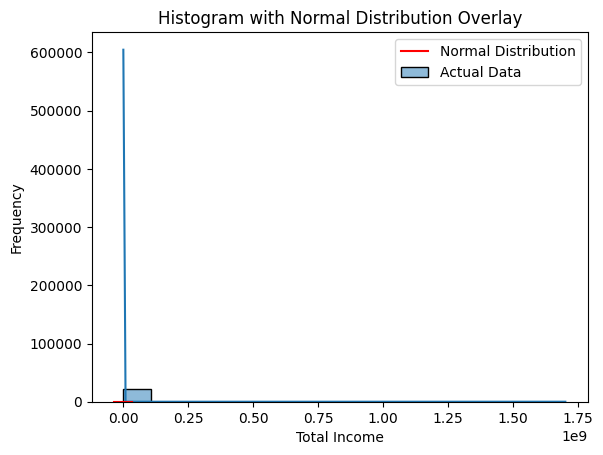

In [ ]:
# Create a histogram of 'total_income'
sns.histplot(unique_income['total_income'], kde=True, label='Actual Data')

# Overlay a normal distribution on the histogram
mu, sigma = np.mean(unique_income['total_income']), np.std(unique_income['total_income'])
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution', color='red')

plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution Overlay')
plt.legend()
plt.show()

Dropping household data with 0.0 total income

In [ ]:
used_income_ = unique_income[unique_income['total_income'] != 0.0]

In [ ]:
used_income_.head()

,zone,state,lga,sector,ea,hhid,total_income
1,4,1,101,1,186,101002,2300000.0
3,4,1,101,1,186,101004,50000.0
7,4,1,101,1,186,101008,50000.0
8,4,1,101,1,186,101009,10000.0
9,4,1,101,1,186,101010,12000.0


In [ ]:
used_income_.shape

(2359, 7)

## Merging Income Data with other merged survey data

In [ ]:
full_df = pd.merge(merged_data, used_income_, on=['zone','state','lga','sector','ea','hhid'])

In [ ]:
full_df.head()

,zone,state,lga,sector,ea,hhid,indiv,s01q02,s01q03,s01q04a,s01q07a,s01q07,s01q11,s01q12,s01q13,s01q15,s01q17,s01q18,s01q20,s01q21,s02q01,s02q02,s02q03,school_yr,s02q04,s02q04b,s02q05,s02q07,s02q08,s02q09,s02q10,s02q11,s02q12,s02q13,s02q14a,s02q14b,s02q15,s02q16,s03q01,s03q02,s03q03,s03q05,s03q06_1,s03q19,s03q22,s03q23,s03q24,s03q25,s03q26,s03q27,s03q28,s03q31,s03q32,s03q33,s04aq01,s04aq02,s04aq04,s04aq06,s04aq09,s04aq11,s04aq21,s04aq48,s05q0,s05q0a,s05q01a,s05q01b,s05q01c,s05q01d,total_income
0,4,1,101,1,186,101002,1,1,1,41,1,1.0,1,2,NaN,0.0,1,2.0,0.0,99,1,1.0,NaN,2017/2018,1.0,2.0,1.0,411.0,8.0,2.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,1,NaN,1,NaN,2.0,2,1,1,1,1,1,1,2,1,5.0,0.0,1,1.0,1.0,2.0,2.0,3.0,NaN,NaN,1,1.0,2.0,2.0,1.0,1.0,2300000.0
1,4,1,101,1,186,101002,2,2,2,27,1,1.0,1,1,2.0,322.0,1,2.0,16.0,5,1,1.0,NaN,2017/2018,1.0,2.0,1.0,34.0,8.0,2.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,1,NaN,2,2.0,NaN,2,1,1,1,1,1,1,2,1,5.0,0.0,1,1.0,2.0,2.0,1.0,3.0,NaN,2.0,1,1.0,2.0,2.0,1.0,2.0,2300000.0
2,4,1,101,1,186,101002,3,2,3,3,2,NaN,1,1,1.0,NaN,1,1.0,NaN,99,1,2.0,1.0,2017/2018,2.0,2.0,1.0,0.0,1.0,1.0,3.0,6.0,1.0,NaN,2.0,1.0,1.0,2.0,2,1.0,2,2.0,NaN,2,1,1,1,2,-1,2,1,1,5.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2300000.0
3,4,1,101,1,186,101002,4,2,3,2,2,NaN,1,1,1.0,NaN,1,1.0,NaN,99,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2,2.0,NaN,2,1,1,3,3,-1,-1,1,1,5.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2300000.0
4,4,1,101,1,186,101002,5,1,3,0,2,NaN,1,1,1.0,NaN,1,1.0,NaN,99,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2,2.0,NaN,2,1,3,-1,-1,-1,-1,1,1,1.0,1000.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2300000.0


In [ ]:
full_df.shape

(12626, 69)

In [ ]:
full_df.rename(columns={'total_income': 'household_total_income'}, inplace=True)

## Visualisations of merged survey data

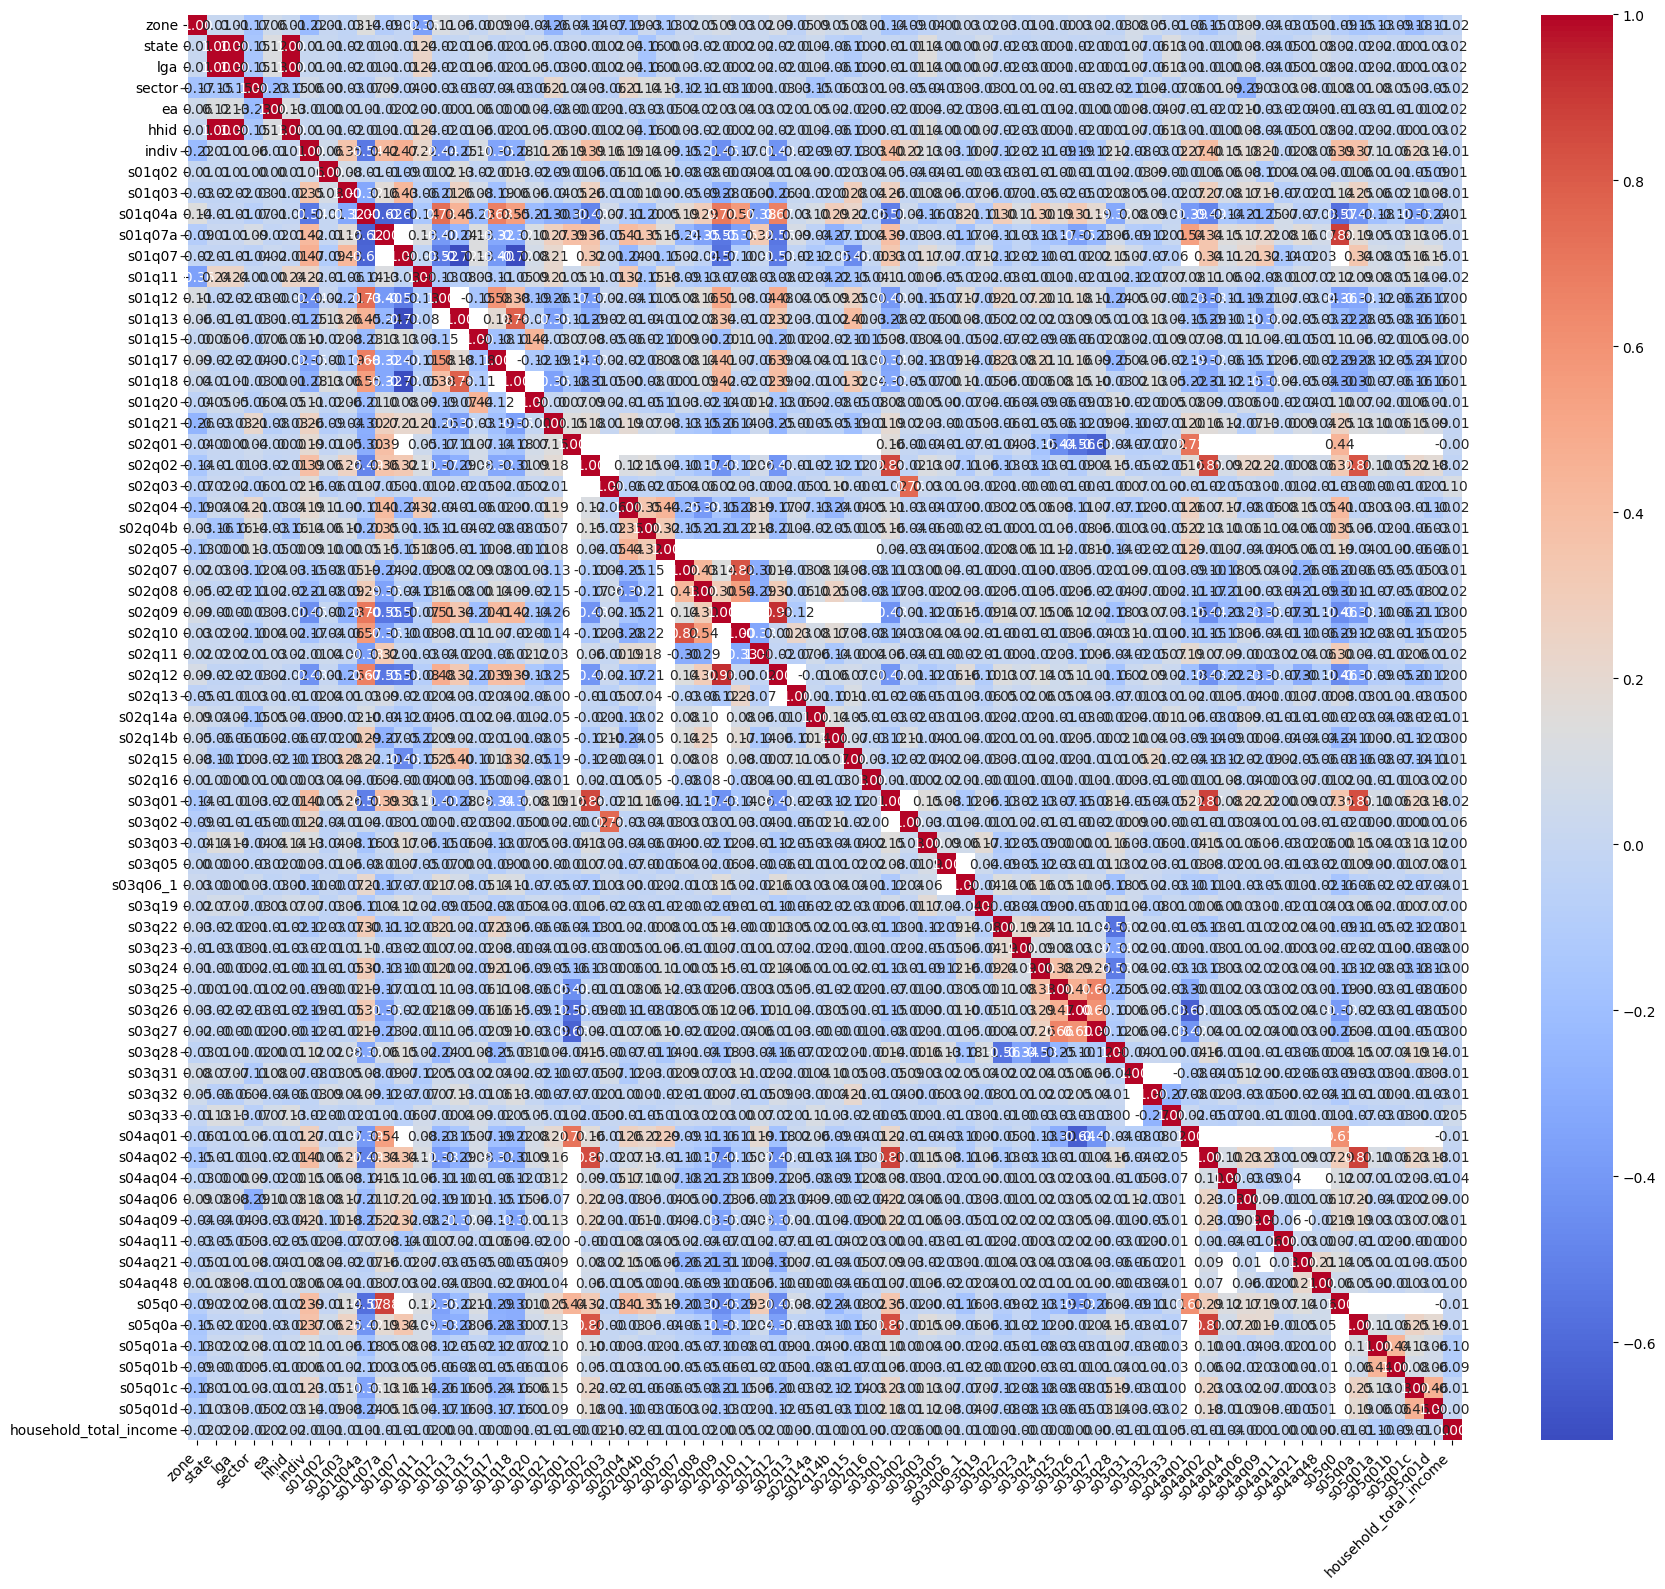

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your final merged DataFrame
correlation_matrix = full_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adjust the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Replace 'variable_x' and 'variable_y' with the actual names of your variables
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='variable_x', y='variable_y', data=merged_data, alpha=0.6)
# plt.title('Scatter Plot between Variable X and Variable Y')
# plt.xlabel('Variable X')
# plt.ylabel('Variable Y')
# plt.show()


In [ ]:
# To compare the distribution of a key variable across different groups
# Replace 'group_variable' and 'key_variable' with your actual column names
# plt.figure(figsize=(10, 8))
# sns.boxplot(x='group_variable', y='key_variable', data=merged_data)
# plt.title('Distribution of Key Variable Across Different Groups')
# plt.xlabel('Group Variable')
# plt.ylabel('Key Variable')
# plt.show()

In [ ]:
full_mis = missing_values(full_df)
full_mis.head(20)

,Column,Missing Percentage
s02q14b,s02q14b,64.969111
s03q06_1,s03q06_1,62.933629
s02q10,s02q10,62.157453
s02q14a,s02q14a,62.149533
s02q11,s02q11,62.149533
s02q15,s02q15,62.149533
s02q16,s02q16,62.149533
s02q13,s02q13,52.376049
s01q20,s01q20,52.193886
s01q15,s01q15,50.736575


In [ ]:
#Drop columns with more than 50% missing data

full_df = drop_columns(full_df, 50)

In [ ]:
full_df.isnull().sum()/len(full_df)*100

zone                       0.000000
state                      0.000000
lga                        0.000000
sector                     0.000000
ea                         0.000000
hhid                       0.000000
indiv                      0.000000
s01q02                     0.000000
s01q03                     0.000000
s01q04a                    0.000000
s01q07a                    0.000000
s01q07                    28.575954
s01q11                     0.000000
s01q12                     0.000000
s01q13                    32.892444
s01q17                     0.000000
s01q18                    24.782195
s01q21                     0.000000
s02q01                     0.000000
s02q02                     5.670838
s02q03                    38.056392
school_yr                  5.670838
s02q04                     5.670838
s02q04b                    5.670838
s02q05                     5.670838
s02q07                    16.592745
s02q08                    16.592745
s02q09                    16

Filling missing values using the 'bfill' method

In [ ]:
full_df = full_df.fillna(method='bfill')

In [ ]:
full_df.head()

,zone,state,lga,sector,ea,hhid,indiv,s01q02,s01q03,s01q04a,s01q07a,s01q07,s01q11,s01q12,s01q13,s01q17,s01q18,s01q21,s02q01,s02q02,s02q03,school_yr,s02q04,s02q04b,s02q05,s02q07,s02q08,s02q09,s02q12,s03q01,s03q02,s03q03,s03q05,s03q19,s03q22,s03q23,s03q24,s03q25,s03q26,s03q27,s03q28,s03q31,s03q32,s03q33,s04aq01,s04aq02,s04aq04,s04aq06,s04aq09,s04aq11,s04aq21,s04aq48,s05q0,s05q0a,s05q01a,s05q01b,s05q01c,s05q01d,household_total_income
0,4,1,101,1,186,101002,1,1,1,41,1,1.0,1,2,2.0,1,2.0,99,1,1.0,1.0,2017/2018,1.0,2.0,1.0,411.0,8.0,2.0,2.0,1,1.0,1,2.0,2,1,1,1,1,1,1,2,1,5.0,0.0,1,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1,1.0,2.0,2.0,1.0,1.0,2300000.0
1,4,1,101,1,186,101002,2,2,2,27,1,1.0,1,1,2.0,1,2.0,5,1,1.0,1.0,2017/2018,1.0,2.0,1.0,34.0,8.0,2.0,2.0,1,1.0,2,2.0,2,1,1,1,1,1,1,2,1,5.0,0.0,1,1.0,2.0,2.0,1.0,3.0,2.0,2.0,1,1.0,2.0,2.0,1.0,2.0,2300000.0
2,4,1,101,1,186,101002,3,2,3,3,2,1.0,1,1,1.0,1,1.0,99,1,2.0,1.0,2017/2018,2.0,2.0,1.0,0.0,1.0,1.0,1.0,2,1.0,2,2.0,2,1,1,1,2,-1,2,1,1,5.0,0.0,2,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2,2.0,2.0,2.0,2.0,2.0,2300000.0
3,4,1,101,1,186,101002,4,2,3,2,2,1.0,1,1,1.0,1,1.0,99,2,2.0,2.0,2017/2018,1.0,2.0,1.0,26.0,6.0,2.0,2.0,2,1.0,2,2.0,2,1,1,3,3,-1,-1,1,1,5.0,0.0,2,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2,2.0,2.0,2.0,2.0,2.0,2300000.0
4,4,1,101,1,186,101002,5,1,3,0,2,1.0,1,1,1.0,1,1.0,99,2,2.0,2.0,2017/2018,1.0,2.0,1.0,26.0,6.0,2.0,2.0,2,1.0,2,2.0,2,1,3,-1,-1,-1,-1,1,1,1.0,1000.0,2,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2,2.0,2.0,2.0,2.0,2.0,2300000.0


In [ ]:
full_df.isnull().sum()

zone                      0
state                     0
lga                       0
sector                    0
ea                        0
hhid                      0
indiv                     0
s01q02                    0
s01q03                    0
s01q04a                   0
s01q07a                   0
s01q07                    2
s01q11                    0
s01q12                    0
s01q13                    0
s01q17                    0
s01q18                    0
s01q21                    0
s02q01                    0
s02q02                    2
s02q03                    4
school_yr                 2
s02q04                    2
s02q04b                   2
s02q05                    2
s02q07                    2
s02q08                    2
s02q09                    2
s02q12                    2
s03q01                    0
s03q02                    0
s03q03                    0
s03q05                    0
s03q19                    0
s03q22                    0
s03q23              

There are still some missing values so we fill this again using the 'ffill' method.

In [ ]:
full_df = full_df.fillna(method='ffill')

In [ ]:
full_df.isnull().sum()

zone                      0
state                     0
lga                       0
sector                    0
ea                        0
hhid                      0
indiv                     0
s01q02                    0
s01q03                    0
s01q04a                   0
s01q07a                   0
s01q07                    0
s01q11                    0
s01q12                    0
s01q13                    0
s01q17                    0
s01q18                    0
s01q21                    0
s02q01                    0
s02q02                    0
s02q03                    0
school_yr                 0
s02q04                    0
s02q04b                   0
s02q05                    0
s02q07                    0
s02q08                    0
s02q09                    0
s02q12                    0
s03q01                    0
s03q02                    0
s03q03                    0
s03q05                    0
s03q19                    0
s03q22                    0
s03q23              

In [ ]:
full_df.head()

,zone,state,lga,sector,ea,hhid,indiv,s01q02,s01q03,s01q04a,s01q07a,s01q07,s01q11,s01q12,s01q13,s01q17,s01q18,s01q21,s02q01,s02q02,s02q03,school_yr,s02q04,s02q04b,s02q05,s02q07,s02q08,s02q09,s02q12,s03q01,s03q02,s03q03,s03q05,s03q19,s03q22,s03q23,s03q24,s03q25,s03q26,s03q27,s03q28,s03q31,s03q32,s03q33,s04aq01,s04aq02,s04aq04,s04aq06,s04aq09,s04aq11,s04aq21,s04aq48,s05q0,s05q0a,s05q01a,s05q01b,s05q01c,s05q01d,household_total_income
0,4,1,101,1,186,101002,1,1,1,41,1,1.0,1,2,2.0,1,2.0,99,1,1.0,1.0,2017/2018,1.0,2.0,1.0,411.0,8.0,2.0,2.0,1,1.0,1,2.0,2,1,1,1,1,1,1,2,1,5.0,0.0,1,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1,1.0,2.0,2.0,1.0,1.0,2300000.0
1,4,1,101,1,186,101002,2,2,2,27,1,1.0,1,1,2.0,1,2.0,5,1,1.0,1.0,2017/2018,1.0,2.0,1.0,34.0,8.0,2.0,2.0,1,1.0,2,2.0,2,1,1,1,1,1,1,2,1,5.0,0.0,1,1.0,2.0,2.0,1.0,3.0,2.0,2.0,1,1.0,2.0,2.0,1.0,2.0,2300000.0
2,4,1,101,1,186,101002,3,2,3,3,2,1.0,1,1,1.0,1,1.0,99,1,2.0,1.0,2017/2018,2.0,2.0,1.0,0.0,1.0,1.0,1.0,2,1.0,2,2.0,2,1,1,1,2,-1,2,1,1,5.0,0.0,2,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2,2.0,2.0,2.0,2.0,2.0,2300000.0
3,4,1,101,1,186,101002,4,2,3,2,2,1.0,1,1,1.0,1,1.0,99,2,2.0,2.0,2017/2018,1.0,2.0,1.0,26.0,6.0,2.0,2.0,2,1.0,2,2.0,2,1,1,3,3,-1,-1,1,1,5.0,0.0,2,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2,2.0,2.0,2.0,2.0,2.0,2300000.0
4,4,1,101,1,186,101002,5,1,3,0,2,1.0,1,1,1.0,1,1.0,99,2,2.0,2.0,2017/2018,1.0,2.0,1.0,26.0,6.0,2.0,2.0,2,1.0,2,2.0,2,1,3,-1,-1,-1,-1,1,1,1.0,1000.0,2,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2,2.0,2.0,2.0,2.0,2.0,2300000.0


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12626 entries, 0 to 12625
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   zone                    12626 non-null  int64  
 1   state                   12626 non-null  int64  
 2   lga                     12626 non-null  int64  
 3   sector                  12626 non-null  int64  
 4   ea                      12626 non-null  int64  
 5   hhid                    12626 non-null  int64  
 6   indiv                   12626 non-null  int64  
 7   s01q02                  12626 non-null  int64  
 8   s01q03                  12626 non-null  int64  
 9   s01q04a                 12626 non-null  int64  
 10  s01q07a                 12626 non-null  int64  
 11  s01q07                  12626 non-null  float64
 12  s01q11                  12626 non-null  int64  
 13  s01q12                  12626 non-null  int64  
 14  s01q13                  12626 non-null

In [ ]:
full_df = full_df.drop('school_yr', axis=1)

In [ ]:
full_df.columns

Index(['zone', 'state', 'lga', 'sector', 'ea', 'hhid', 'indiv', 's01q02',
       's01q03', 's01q04a', 's01q07a', 's01q07', 's01q11', 's01q12', 's01q13',
       's01q17', 's01q18', 's01q21', 's02q01', 's02q02', 's02q03', 's02q04',
       's02q04b', 's02q05', 's02q07', 's02q08', 's02q09', 's02q12', 's03q01',
       's03q02', 's03q03', 's03q05', 's03q19', 's03q22', 's03q23', 's03q24',
       's03q25', 's03q26', 's03q27', 's03q28', 's03q31', 's03q32', 's03q33',
       's04aq01', 's04aq02', 's04aq04', 's04aq06', 's04aq09', 's04aq11',
       's04aq21', 's04aq48', 's05q0', 's05q0a', 's05q01a', 's05q01b',
       's05q01c', 's05q01d', 'household_total_income'],
      dtype='object')

In [ ]:
full_df.describe()

,zone,state,lga,sector,ea,hhid,indiv,s01q02,s01q03,s01q04a,s01q07a,s01q07,s01q11,s01q12,s01q13,s01q17,s01q18,s01q21,s02q01,s02q02,s02q03,s02q04,s02q04b,s02q05,s02q07,s02q08,s02q09,s02q12,s03q01,s03q02,s03q03,s03q05,s03q19,s03q22,s03q23,s03q24,s03q25,s03q26,s03q27,s03q28,s03q31,s03q32,s03q33,s04aq01,s04aq02,s04aq04,s04aq06,s04aq09,s04aq11,s04aq21,s04aq48,s05q0,s05q0a,s05q01a,s05q01b,s05q01c,s05q01d,household_total_income
count,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,1.262600e+04,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.00000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.00000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,12626.000000,1.262600e+04
mean,3.580944,18.217092,1833.039759,1.595755,1096.484952,1.833341e+06,4.334865,1.496594,2.990733,27.139791,1.285760,3.853160,1.449311,1.328924,1.284651,1.247822,1.343418,72.934421,1.056708,1.639078,1.715824,1.396642,1.498891,1.117218,69.572153,4.538730,1.588072,1.610169,1.677332,1.810946,1.666244,1.925550,1.927134,1.056629,1.023048,1.055520,0.990575,0.91470,0.957706,1.888167,1.491367,4.646998,98.242515,1.104705,1.608585,1.916521,1.697133,1.790353,2.96230,1.927768,1.972755,1.237051,1.530493,1.965230,1.984793,1.698004,1.752970,6.276414e+05
std,1.692752,10.094594,1008.882611,0.490765,912.197729,1.008885e+06,3.325440,0.500008,2.008811,21.591649,0.451793,2.770792,0.513428,0.469841,0.451266,0.431765,0.474868,39.418007,0.231294,0.480287,1.685920,0.489220,0.500019,0.321693,125.614232,5.543603,0.492202,0.487731,0.467515,1.914566,0.471572,0.262511,0.259926,0.285145,0.188437,0.415928,0.388129,0.52676,0.403687,0.315173,0.499945,1.635053,349.774230,0.306185,0.488086,0.276615,0.459516,0.407073,0.23209,0.258882,0.162804,0.425290,0.499089,0.183203,0.122379,0.459142,0.431301,2.621123e+07
min,1.000000,1.000000,101.000000,1.000000,2.000000,1.010020e+05,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.00000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000e+02
25%,2.000000,10.000000,1008.000000,1.000000,428.000000,1.008496e+06,2.000000,1.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,5.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.400000e+04
50%,3.000000,18.000000,1822.000000,2.000000,902.000000,1.822428e+06,3.000000,1.000000,3.000000,20.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,26.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,5.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000e+04
75%,5.000000,27.000000,2708.000000,2.000000,1480.000000,2.708508e+06,6.000000,2.000000,3.000000,41.000000,2.00

In [ ]:
#checking the distribution of the income column

full_df['household_total_income'].value_counts()

10000.0      487
30000.0      447
60000.0      443
20000.0      441
50000.0      376
            ... 
790000.0       1
984000.0       1
928000.0       1
150.0          1
4040000.0      1
Name: household_total_income, Length: 400, dtype: int64

In [ ]:
#Checking the statistics of this column in order to understand its distribution

full_df['household_total_income'].describe()

count    1.262600e+04
mean     6.276414e+05
std      2.621123e+07
min      1.500000e+02
25%      2.400000e+04
50%      6.000000e+04
75%      2.160000e+05
max      1.700500e+09
Name: household_total_income, dtype: float64


Let's interpret the statistics:

count: This represents the number of non-null values in the 'household_total_income' column. In this case, there are 12,626 non-null values, which means there are 12,626 valid entries in this column.

mean: This is the arithmetic mean or average of the 'household_total_income' values. The mean is approximately 627,641.4.

std: This is the standard deviation of the 'household_total_income' values, which measures the spread or dispersion of the data. A high standard deviation (in this case, 26,211,230) indicates that the income values are widely spread out from the mean.

min: This is the minimum value in the 'household_total_income' column, which is 150. This is the lowest recorded household income in your data.

25%: This is the 25th percentile, also known as the first quartile. It indicates that 25% of the 'household_total_income' values are less than or equal to 24,000.

50%: This is the 50th percentile, also known as the median. It represents the middle value of the sorted 'household_total_income' data, which is 60,000. This means that half of the households have a total income below 60,000, and half have a total income above 60,000.

75%: This is the 75th percentile, also known as the third quartile. It indicates that 75% of the 'household_total_income' values are less than or equal to 216,000.

max: This is the maximum value in the 'household_total_income' column, which is 1,700,500,000. This is the highest recorded household income in your data.

## Dividing the Household Income into Categories

In [ ]:
# Define income category thresholds based on Nigeria survey data
lower_class_threshold = 100000
middle_class_threshold = 500000

# Create a function to categorize income
def categorize_income(income):
    if income <= lower_class_threshold:
        return 'Lower Class'
    elif income <= middle_class_threshold:
        return 'Middle Class'
    else:
        return 'Upper Class'

# Apply the categorization function to create a new column 'income_category'
full_df['income_category'] = full_df['household_total_income'].apply(categorize_income)

In [ ]:
full_df['income_category'].head(10)

0    Upper Class
1    Upper Class
2    Upper Class
3    Upper Class
4    Upper Class
5    Lower Class
6    Lower Class
7    Lower Class
8    Lower Class
9    Lower Class
Name: income_category, dtype: object

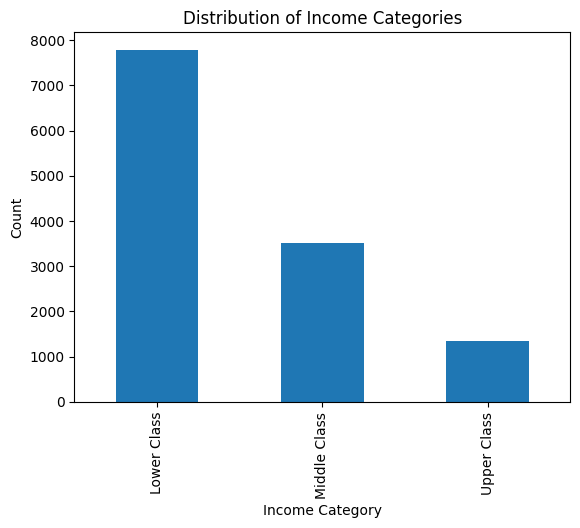

In [ ]:
#Visualising the category distribution

income_category_counts = full_df['income_category'].value_counts()

# Plot the distribution as a bar plot
income_category_counts.plot(kind='bar')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')
plt.show()

In [ ]:
income_category_counts

Lower Class     7784
Middle Class    3503
Upper Class     1339
Name: income_category, dtype: int64

In [ ]:
full_df.shape

(12626, 59)

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Splitting the Dataset

In [ ]:
X = full_df.drop(columns=['income_category','household_total_income','hhid','indiv'])
y = full_df['income_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Modelling

In [ ]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
acc = accuracy_score(y_pred, y_test)
print(f'Random Forest accuracy score: {acc}')

Random Forest accuracy score: 0.7699920823436263


In [ ]:
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

 Lower Class       0.77      0.95      0.85      1545
Middle Class       0.75      0.52      0.62       714
 Upper Class       0.90      0.42      0.57       267

    accuracy                           0.77      2526
   macro avg       0.80      0.63      0.68      2526
weighted avg       0.78      0.77      0.75      2526



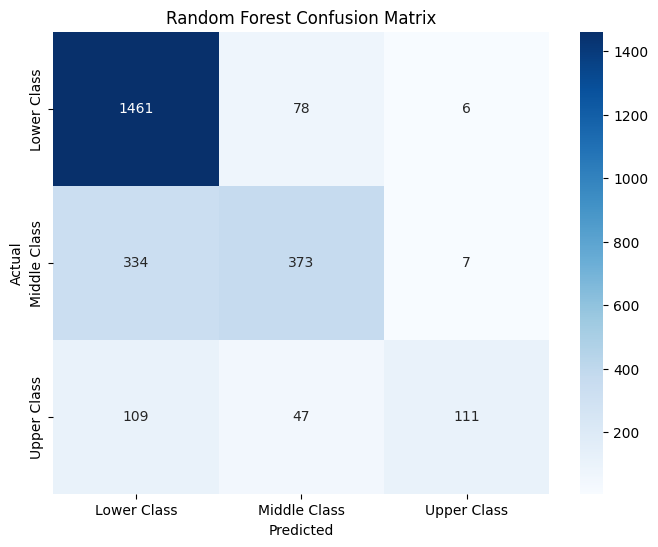

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

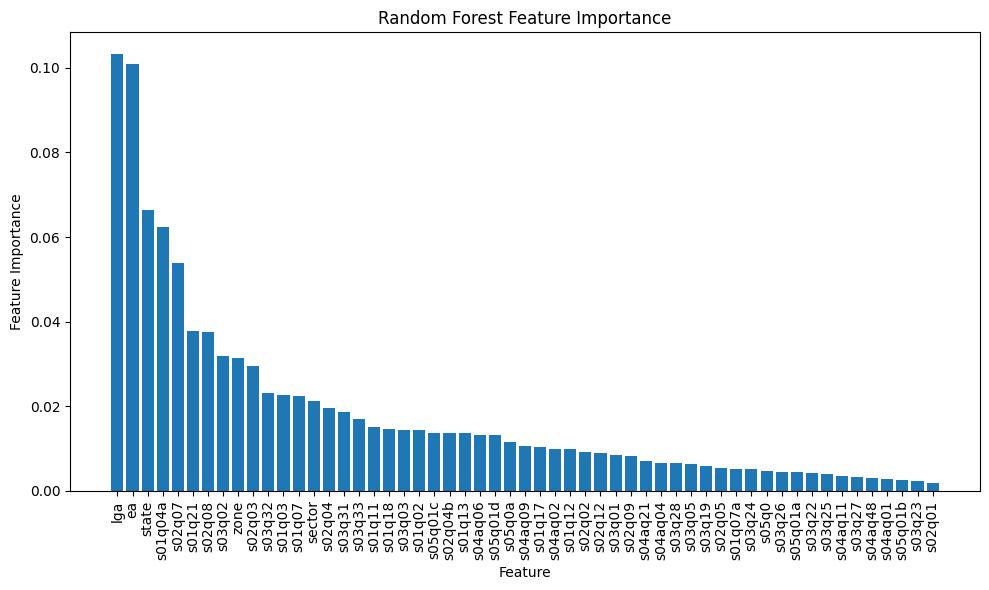

In [ ]:
# Get feature importances
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

## Decision Tree Modelling

In [ ]:
dec = DecisionTreeClassifier(random_state=42)

dec.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred = dec.predict(X_test)

dec_res = classification_report(pred, y_test)
print(dec_res)
print(f'Decision Tree accuracy score: {accuracy_score(y_test, pred)}')

              precision    recall  f1-score   support

 Lower Class       0.86      0.84      0.85      1588
Middle Class       0.65      0.69      0.67       672
 Upper Class       0.61      0.61      0.61       266

    accuracy                           0.78      2526
   macro avg       0.71      0.72      0.71      2526
weighted avg       0.78      0.78      0.78      2526

Decision Tree accuracy score: 0.7759303246239113


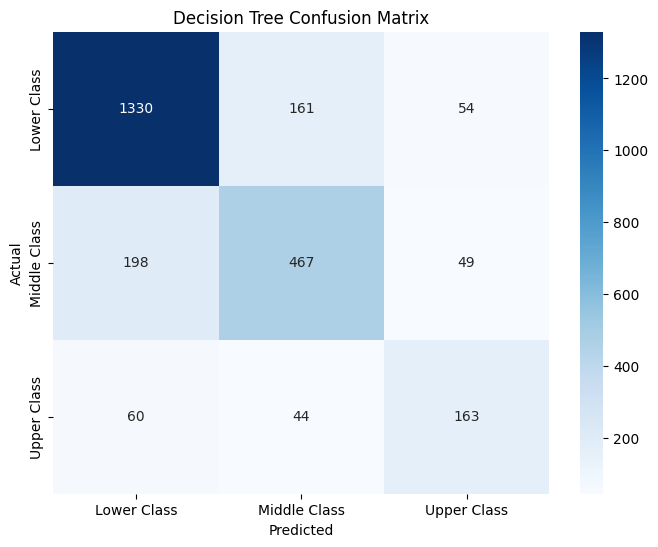

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

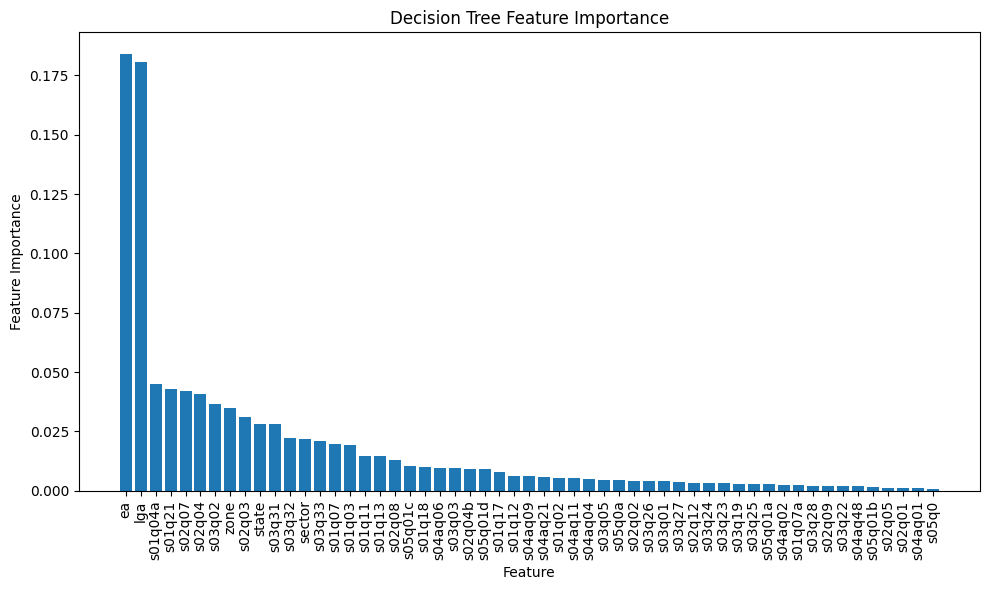

In [ ]:
# Get feature importances
feature_importances = dec.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

## SVC Modelling

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

svc.fit(X_train,y_train)

SVC()

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_res = classification_report(svc_pred, y_test)
print(svc_res)
print('SVC accuracy score:', accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

 Lower Class       1.00      0.62      0.77      2467
Middle Class       0.05      0.61      0.09        56
 Upper Class       0.01      1.00      0.02         3

    accuracy                           0.62      2526
   macro avg       0.35      0.74      0.29      2526
weighted avg       0.97      0.62      0.75      2526

SVC accuracy score: 0.6235154394299287


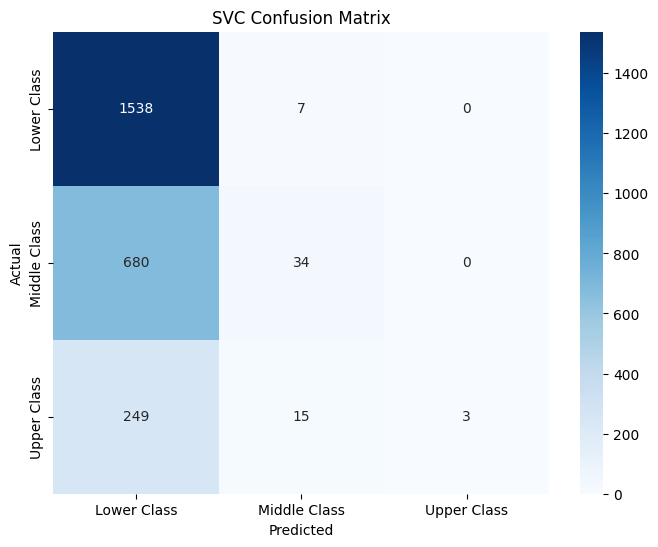

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

In [ ]:
!pip install lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## LGBMClassifier Modelling

In [ ]:
lgb = LGBMClassifier()

lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 10100, number of used features: 55
[LightGBM] [Info] Start training from score -0.481716
[LightGBM] [Info] Start training from score -1.286852
[LightGBM] [Info] Start training from score -2.243009


LGBMClassifier()

In [ ]:
lgb_pred = lgb.predict(X_test)

In [ ]:
lgb_res = classification_report(lgb_pred, y_test)
print(lgb_res)
print('LGBMClassifer accuracy_score: ', accuracy_score(y_test, lgb_pred))

              precision    recall  f1-score   support

 Lower Class       0.94      0.81      0.87      1793
Middle Class       0.61      0.80      0.69       542
 Upper Class       0.59      0.83      0.69       191

    accuracy                           0.81      2526
   macro avg       0.72      0.82      0.75      2526
weighted avg       0.85      0.81      0.82      2526

LGBMClassifer accuracy_score:  0.8131433095803642


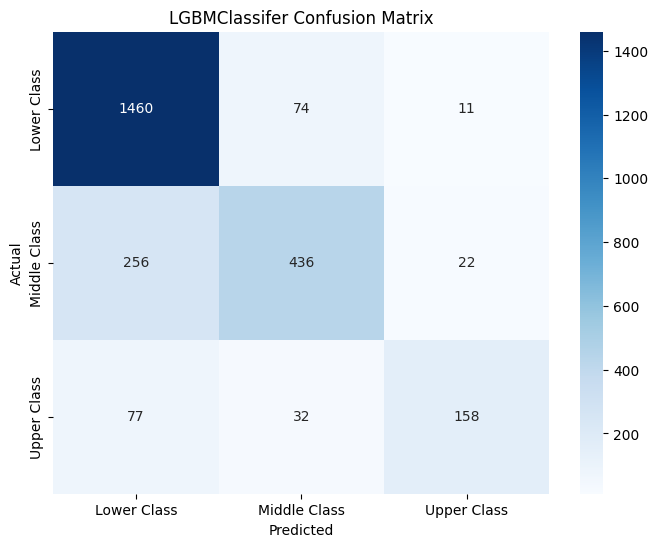

In [ ]:
conf_matrix = confusion_matrix(y_test, lgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LGBMClassifer Confusion Matrix')
plt.show()

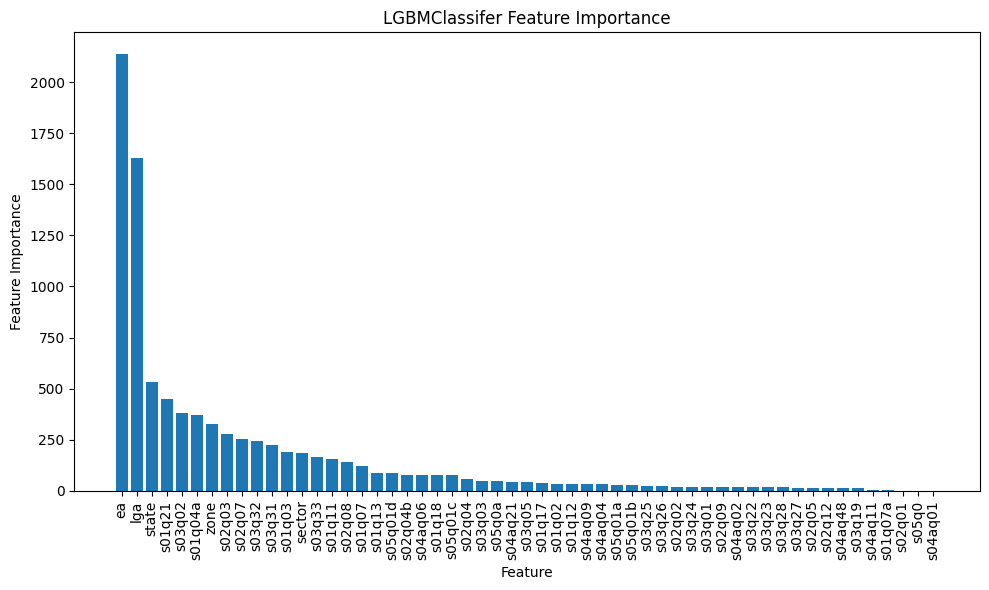

In [ ]:
# Get feature importances
feature_importances = lgb.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('LGBMClassifer Feature Importance')
plt.tight_layout()
plt.show()

## CatBoostClassifier Modelling

In [ ]:
cb = CatBoostClassifier()

cb.fit(X_train, y_train)

Learning rate set to 0.089031
0:	learn: 1.0569123	total: 57.5ms	remaining: 57.4s
1:	learn: 1.0201743	total: 66.8ms	remaining: 33.3s
2:	learn: 0.9903431	total: 76ms	remaining: 25.2s
3:	learn: 0.9625883	total: 85.2ms	remaining: 21.2s
4:	learn: 0.9415032	total: 94.6ms	remaining: 18.8s
5:	learn: 0.9235576	total: 104ms	remaining: 17.2s
6:	learn: 0.9086319	total: 113ms	remaining: 16s
7:	learn: 0.8911492	total: 122ms	remaining: 15.2s
8:	learn: 0.8793163	total: 131ms	remaining: 14.5s
9:	learn: 0.8686362	total: 140ms	remaining: 13.9s
10:	learn: 0.8588555	total: 149ms	remaining: 13.4s
11:	learn: 0.8505233	total: 158ms	remaining: 13s
12:	learn: 0.8420502	total: 167ms	remaining: 12.7s
13:	learn: 0.8341627	total: 176ms	remaining: 12.4s
14:	learn: 0.8288791	total: 185ms	remaining: 12.1s
15:	learn: 0.8221386	total: 194ms	remaining: 11.9s
16:	learn: 0.8169888	total: 205ms	remaining: 11.9s
17:	learn: 0.8121793	total: 214ms	remaining: 11.7s
18:	learn: 0.8068951	total: 225ms	remaining: 11.6s
19:	learn: 0

In [ ]:
cb_pred = cb.predict(X_test)

cb_res = classification_report(cb_pred, y_test)
print(cb_res)
print('CatBoostClassifier accuracy_score:', accuracy_score(y_test, cb_pred))

              precision    recall  f1-score   support

 Lower Class       0.93      0.82      0.87      1763
Middle Class       0.63      0.79      0.70       576
 Upper Class       0.59      0.84      0.69       187

    accuracy                           0.81      2526
   macro avg       0.72      0.81      0.76      2526
weighted avg       0.84      0.81      0.82      2526

CatBoostClassifier accuracy_score: 0.8127474267616785


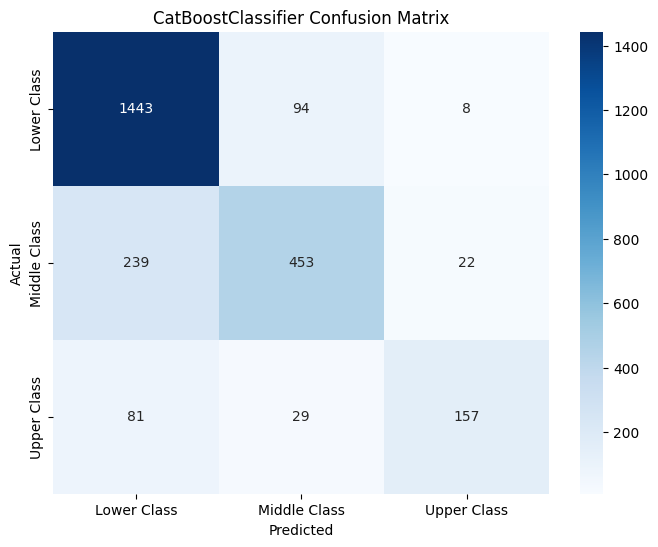

In [ ]:
conf_matrix = confusion_matrix(y_test, cb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoostClassifier Confusion Matrix')
plt.show()

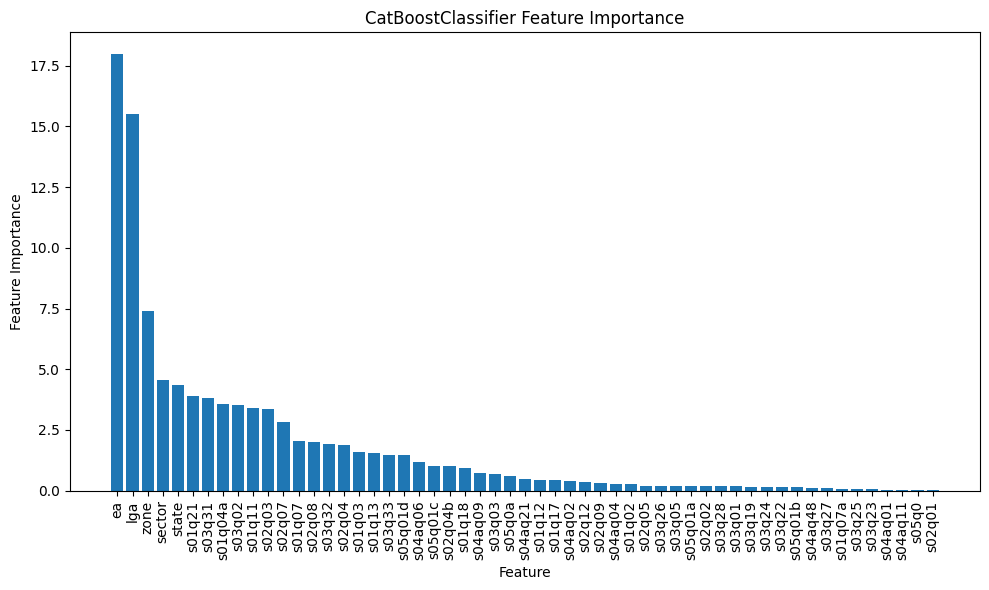

In [ ]:
# Get feature importances
feature_importances = cb.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('CatBoostClassifier Feature Importance')
plt.tight_layout()
plt.show()